## **MONISHA PATRO**
*Data Scientist, Advanced Analytics Assignment*

In this cell, I'm importing the libraries needed for data analysis and visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go

# (Optional) To ensure plots display inline in a notebook
%matplotlib inline

Now, I load the dataset from the provided CSV file.
I'm also checking the first few rows to confirm it loaded properly.

In [ ]:
df = pd.read_csv("Telconnect data.csv")
pd.set_option("display.max_columns", 500)
df.head()

customerID  gender  SeniorCitizen Has_Partner Has_Dependents  \
0  7590-VHVEG  Female              0         Yes             No   
1  5575-GNVDE    Male              0          No             No   
2  3668-QPYBK    Male              0          No             No   
3  7795-CFOCW    Male              0          No             No   
4  9237-HQITU  Female              0          No             No   

   account_tenure PhoneService     MultipleLines InternetService  \
0               1           No  No phone service             DSL   
1              34          Yes                No             DSL   
2               2          Yes                No             DSL   
3              45           No  No phone service             DSL   
4               2          Yes                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes

Here, I check the shape, data types, and some basic info about the dataframe.
This helps me see how many records, columns, and if there are any obvious issues.

---

I want to see if there are any missing values in the dataset. This is crucial for deciding whether we need to impute or drop records.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Has_Partner       7043 non-null   object 
 4   Has_Dependents    7043 non-null   object 
 5   account_tenure    7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Has_Partner         0
Has_Dependents      0
account_tenure      0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Notes/Assumptions:**

- If any columns have a significant number of missing values, I’ll consider how to handle them (drop, fill, or impute).
- Sometimes, columns like TotalCharges may have spaces or be stored as strings and could show up as missing when converting to numeric.

In [ ]:
df.describe().transpose()

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
account_tenure  7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
account_tenure   72.00  
MonthlyCharges  118.75

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Has_Partner',
       'Has_Dependents', 'account_tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

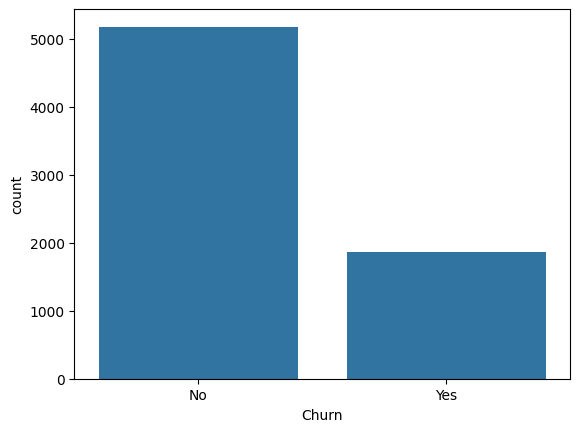

In [ ]:
sns.countplot(data=df,x='Churn')

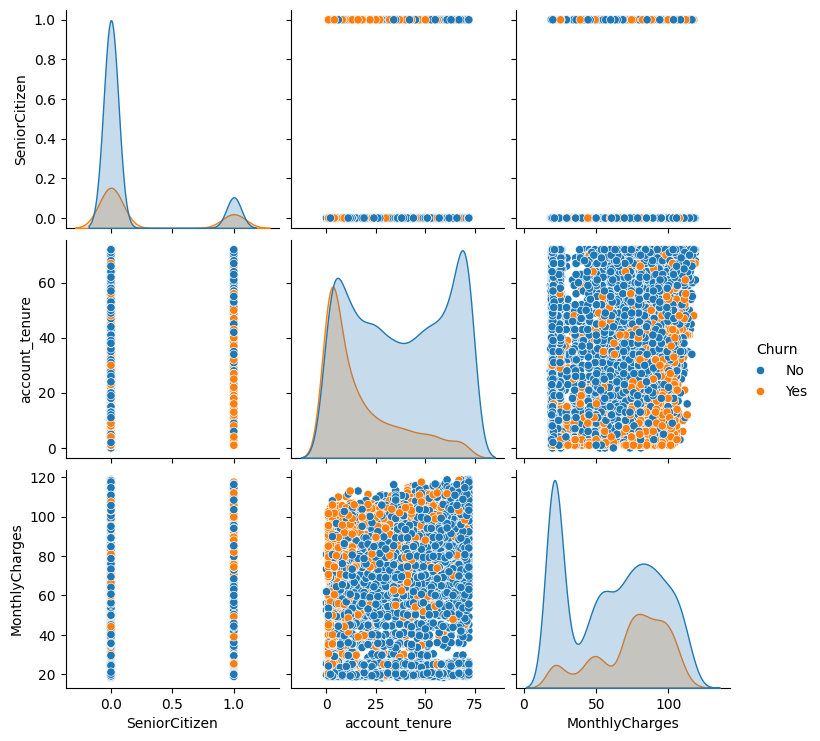

In [ ]:
sns.pairplot(data=df,hue='Churn')

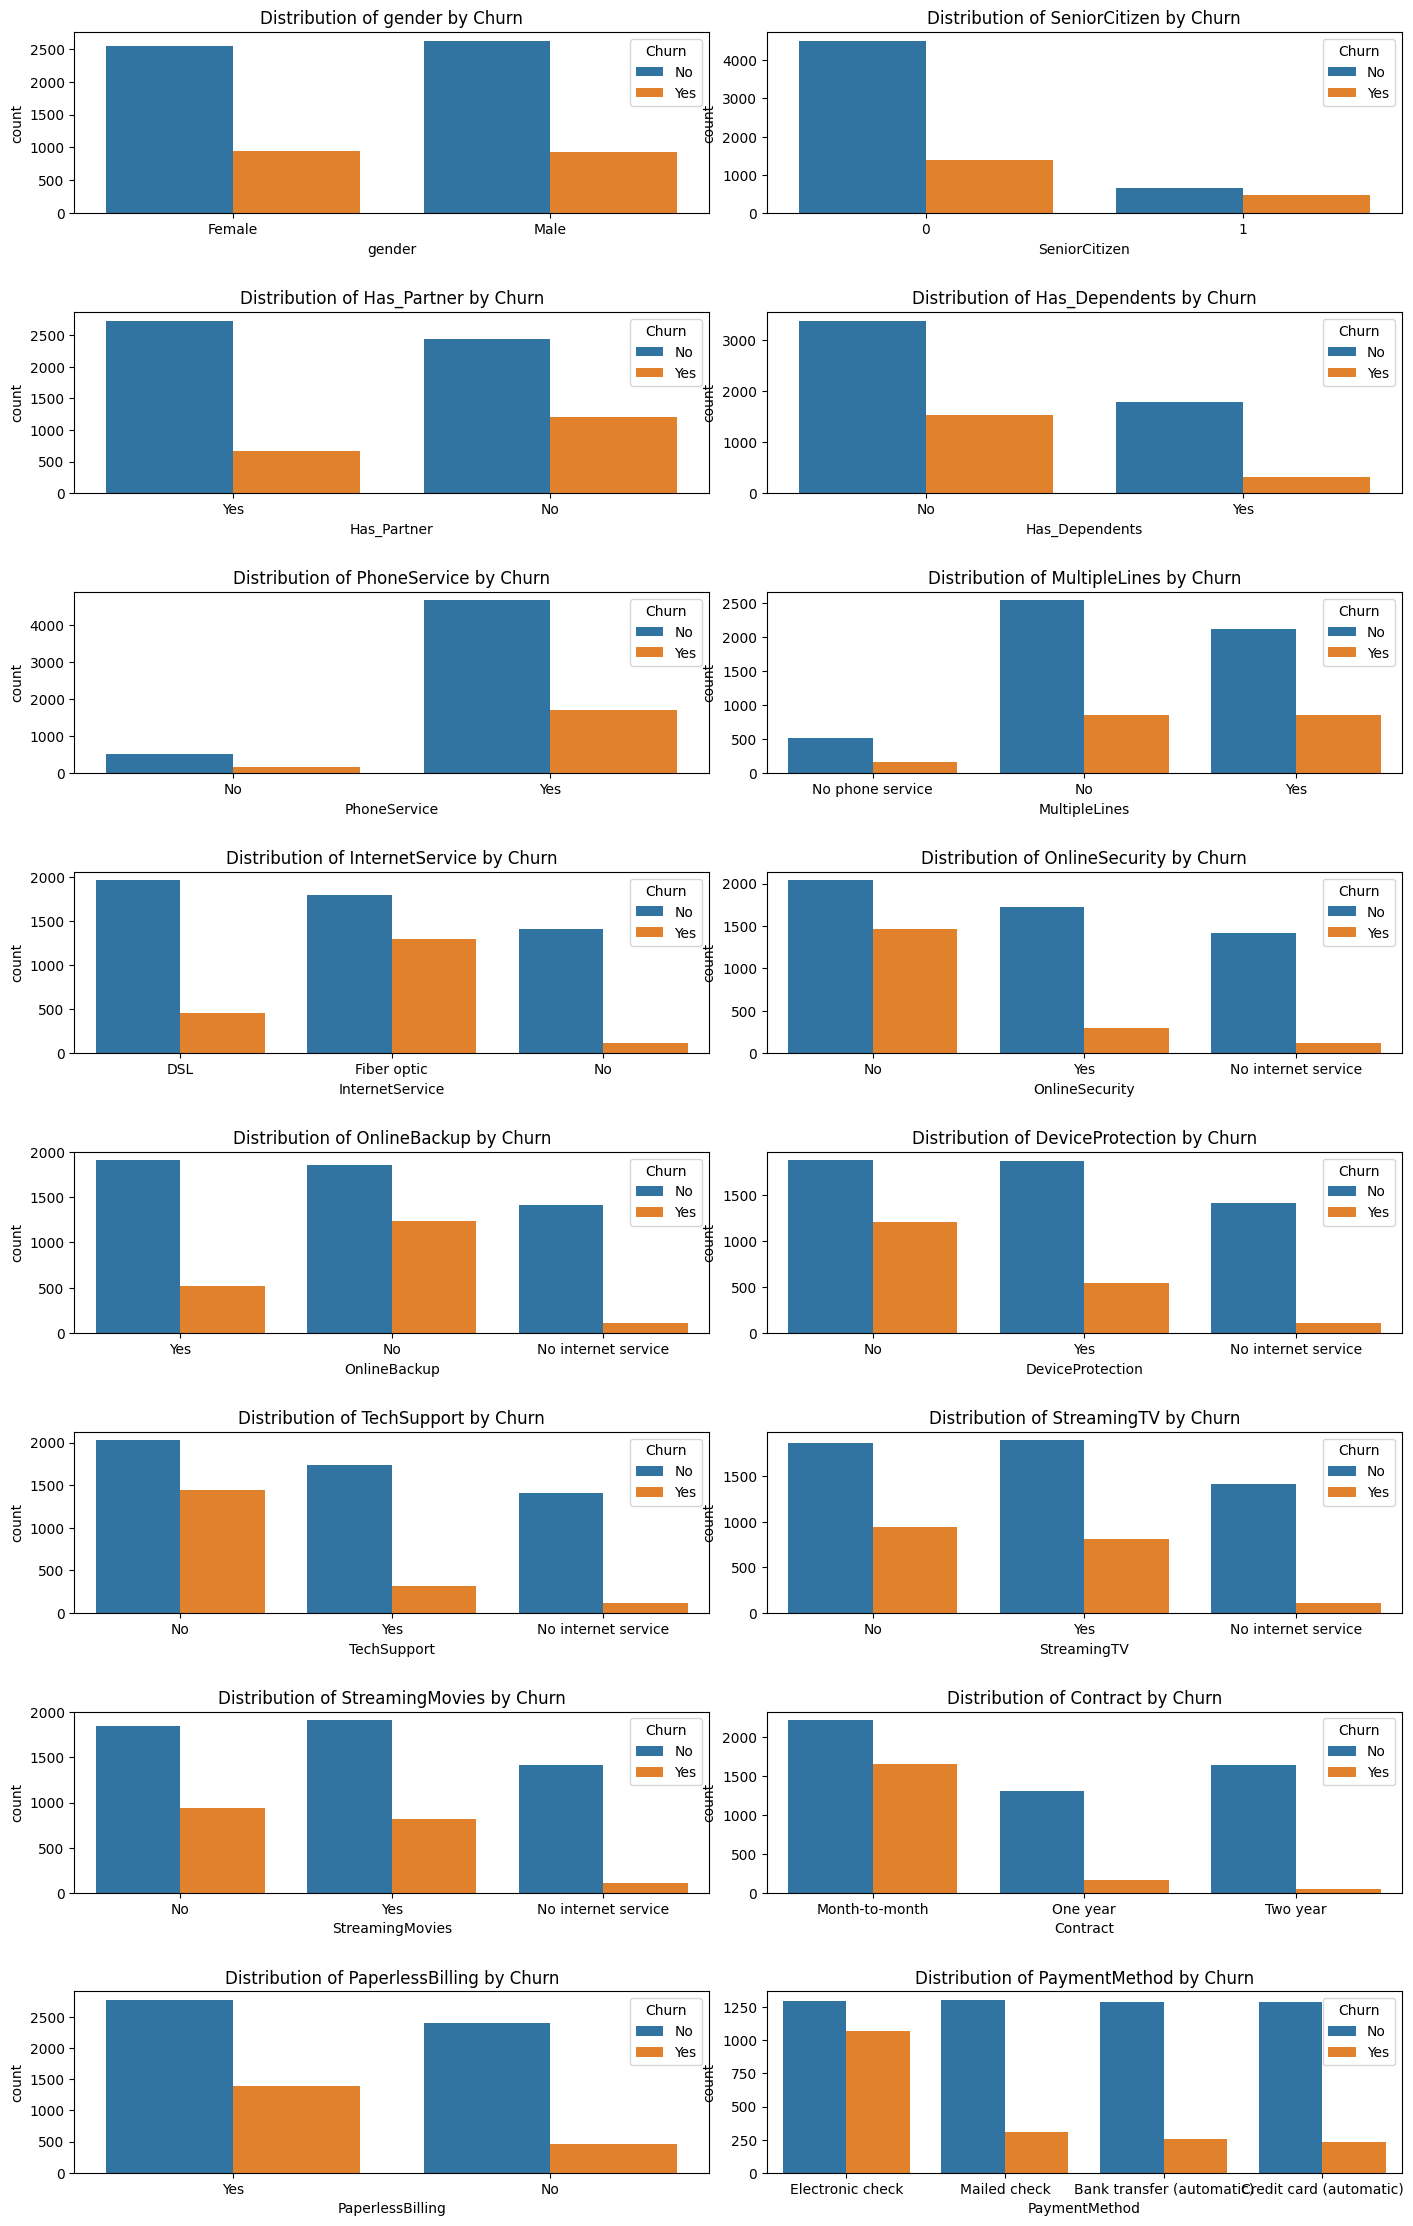

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For each categorical variable, create a count plot to see its distribution with respect to Churn
categorical_vars = ['gender', 'SeniorCitizen', 'Has_Partner', 'Has_Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 22))
fig.tight_layout(h_pad=5.0)

for i, var in enumerate(categorical_vars):
    row, col = i // 2, i % 2
    sns.countplot(data=df, x=var, hue='Churn', ax=axes[row][col])
    axes[row][col].set_title('Distribution of {} by Churn'.format(var))

plt.show()

In [ ]:
df.shape

(7043, 21)

In [ ]:
#it is imbalanced, but not too imbalanced.We can always check later on if the model doesn't perform well
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
print(df['TotalCharges'].dtype)

object


Lets convert this to numeric type.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Has_Partner          0
Has_Dependents       0
account_tenure       0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

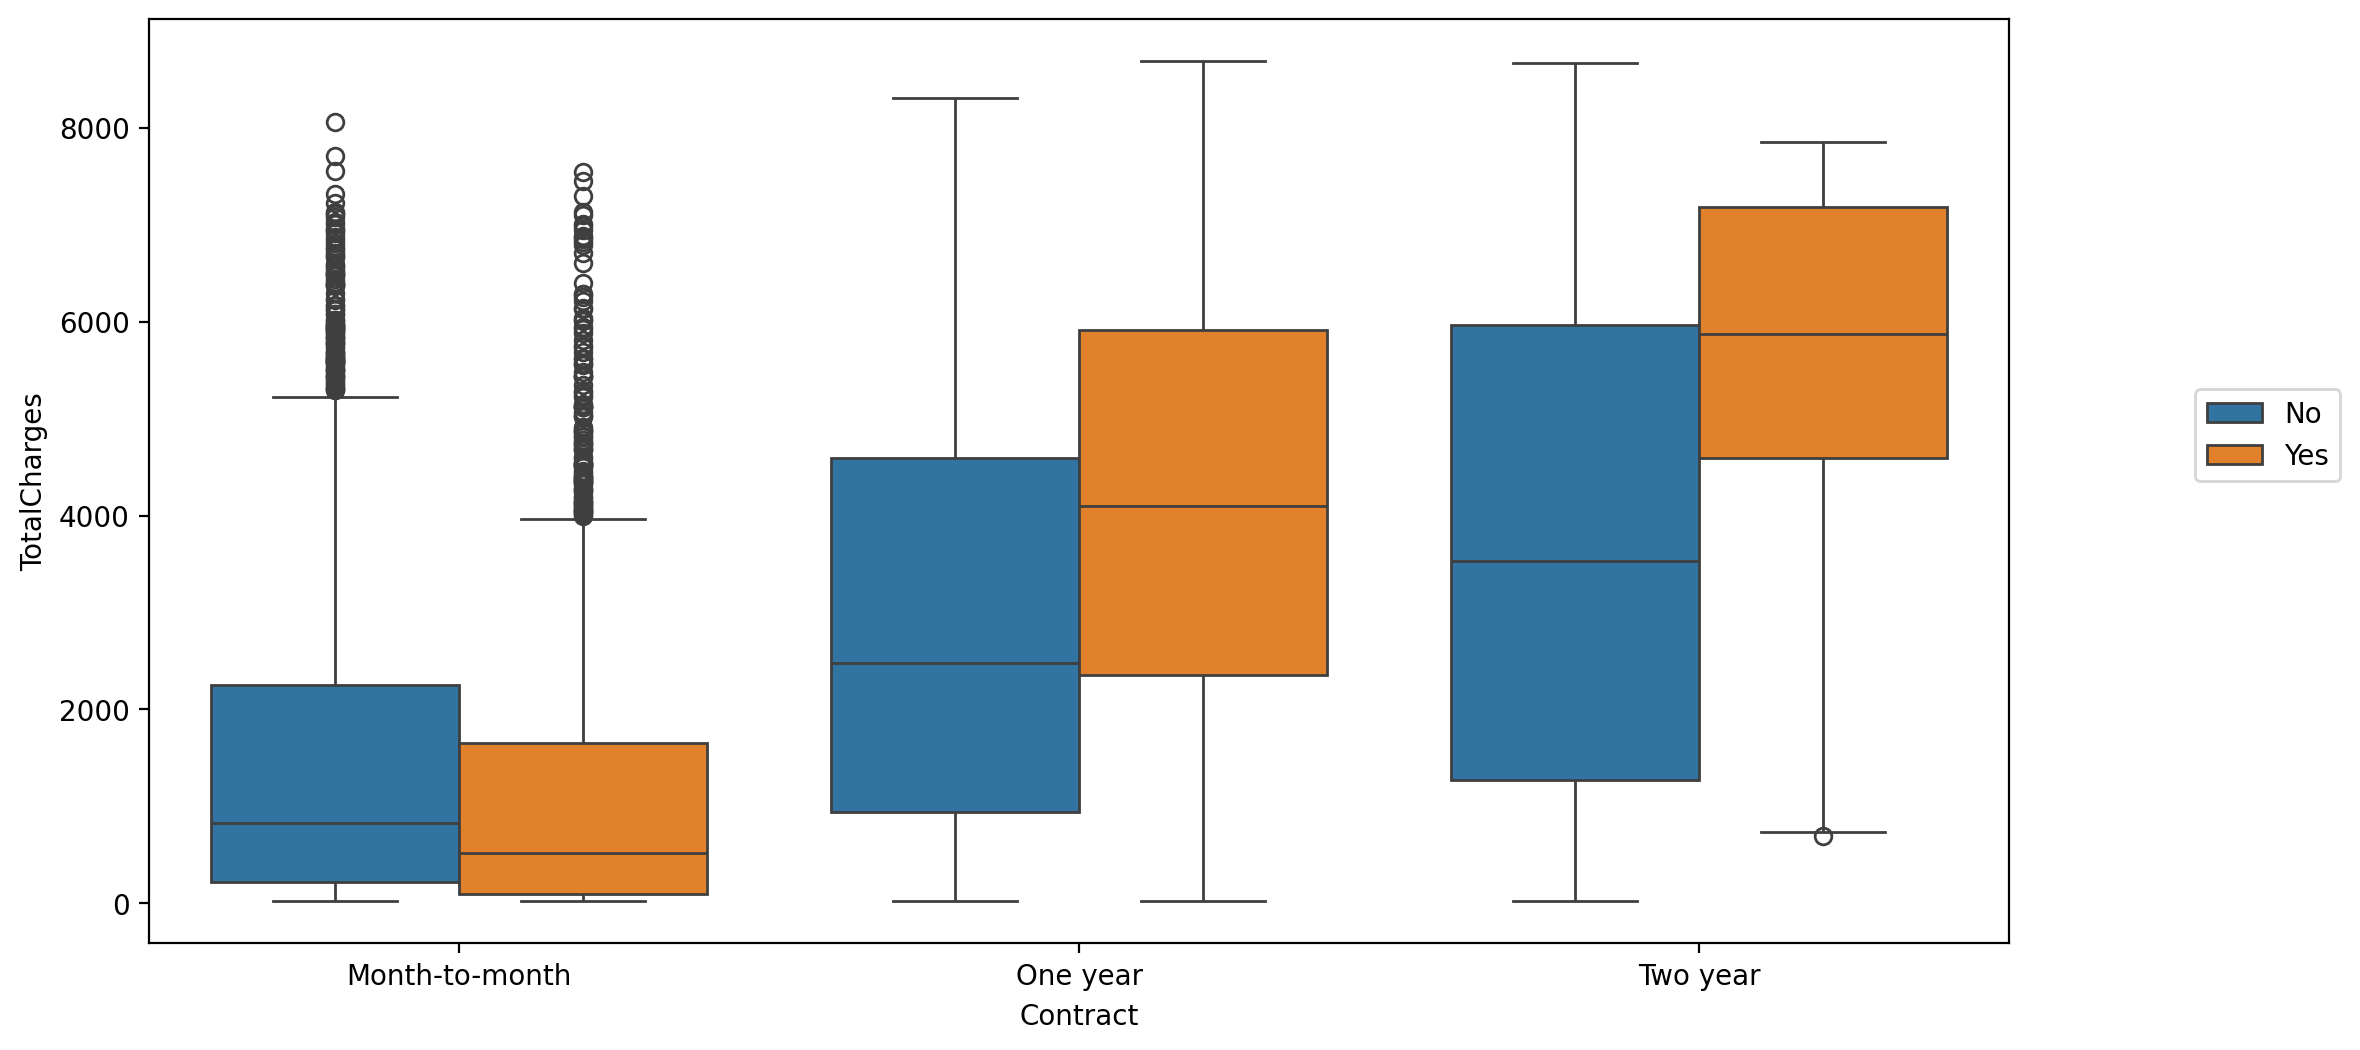

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=(1.1,0.5))

This shows how the people with 1 and 2 year contracts who did churn had significantly higher total charges than the people who didn't churn.

**THEN THE COMPANY HAS TO THINK OF A SOLUTION TO TRY AND REDUCE THESE CHARGES TO TRY AND KEEP THE CUSTOMERS...SOMETHING LIKE DISCOUNT COUPONS OR LOYALTY DISCOUNT.**



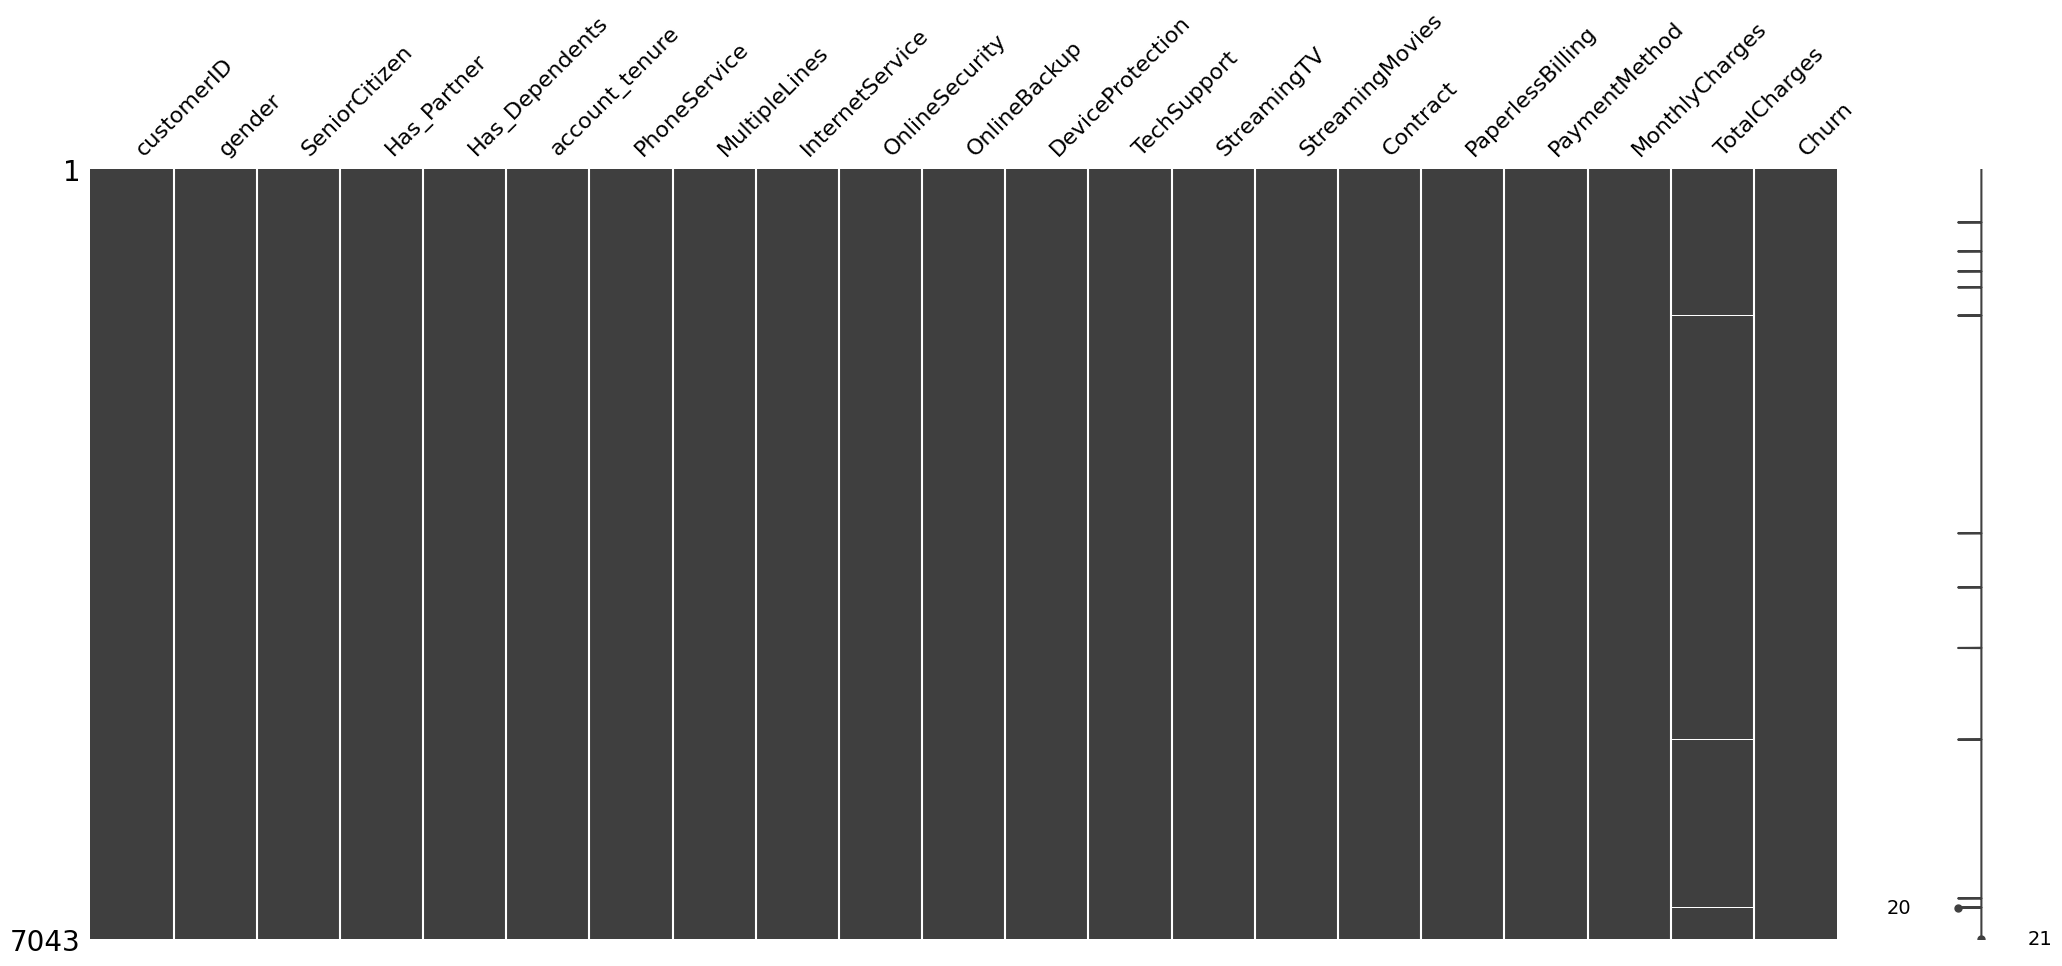

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

In [ ]:
# Check for any new missing values created by the conversion
print(df['TotalCharges'].isnull().sum())

11


## **EXPLORATORY DATA ANALYSIS:**
 Now I convert the categorical columns into numbers by One Hot Encoding(pd.get_dummies) and then PLOT a correlation graph

- ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling', 'PaymentMethod']

- Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID. AND WE ALSO ADD CHURN IN THIS TO GET 0's AND 1's

In [ ]:
df.rename(columns={'Has_Partner': 'Partner', 'Has_Dependents': 'Dependents', 'account_tenure': 'tenure'}, inplace=True)

In [ ]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService',
                             'MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
                             'InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                             'PaymentMethod','Churn']])
#we dont use drop_first=True here just for the sake of the visualiztion, plus it didnt cause ay problems here.
#Other times we can drop it.

SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0                 0           True        False       False         True   
1                 0          False         True        True        False   
2                 0          False         True        True        False   
3                 0          False         True        True        False   
4                 0           True        False        True        False   
...             ...            ...          ...         ...          ...   
7038              0          False         True       False         True   
7039              0           True        False       False         True   
7040              0           True        False       False         True   
7041              1          False         True       False         True   
7042              0          False         True        True        False   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0              True           False             True             False   
1              True           False            False              True   
2              True           False            False              True   
3              True           False             True             False   
4              True           False            False              True   
...             ...             ...              ...               ...   
7038          False            True            False              True   
7039          False            True            False              True   
7040          False            True             True             False   
7041           True           False            False              True   
7042           True           False            False              True   

      MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                False                            True              False   
1                 True                           False              False   
2                 True                           False              False   
3                False                            True              False   
4                 True                           False              False   
...                ...                             ...                ...   
7038             False                           False               True   
7039             False                           False               True   
7040             False                            True              False   
7041             False                           False               True   
7042              True                           False              False   

      OnlineSecurity_No  OnlineSecurity_No internet service  \
0                  True                               False   
1                 False                               False   
2                 False                               False   
3                 False                               False   
4                  True                               False   
...                 ...                                 ...   
7038              False                               False   
7039               True                               False   
7040              False                               False   
7041               True                               False   
7042              False                               False   

      OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0                  False            False                             False   
1                   True             True                             False   
2                   True            False                             False   
3                   True             True                             False   
4                  False             True                             False   
...                  ...              ...       

In [ ]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService',
                             'MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
                             'InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                             'PaymentMethod','Churn']]).corr()

In [ ]:
corr_df

SeniorCitizen  gender_Female  \
SeniorCitizen                                 1.000000       0.001874   
gender_Female                                 0.001874       1.000000   
gender_Male                                  -0.001874      -1.000000   
Partner_No                                   -0.016479      -0.001808   
Partner_Yes                                   0.016479       0.001808   
Dependents_No                                 0.211185       0.010517   
Dependents_Yes                               -0.211185      -0.010517   
PhoneService_No                              -0.008576      -0.006488   
PhoneService_Yes                              0.008576       0.006488   
MultipleLines_No                             -0.136213      -0.004476   
MultipleLines_No phone service               -0.008576      -0.006488   
MultipleLines_Yes                             0.142948       0.008414   
OnlineSecurity_No                             0.185532      -0.010429   
OnlineSecurity_No internet service           -0.182742      -0.006026   
OnlineSecurity_Yes                           -0.038653       0.017021   
OnlineBackup_No                               0.087952      -0.008191   
OnlineBackup_No internet service             -0.182742      -0.006026   
OnlineBackup_Yes                              0.066572       0.013773   
DeviceProtection_No                           0.094810       0.002988   
DeviceProtection_No internet service         -0.182742      -0.006026   
DeviceProtection_Yes                          0.059428       0.002105   
TechSupport_No                                0.205620      -0.003397   
TechSupport_No internet service              -0.182742      -0.006026   
TechSupport_Yes                              -0.060625       0.009212   
InternetService_DSL                          -0.108322      -0.006568   
InternetService_Fiber optic                   0.255338       0.011286   
InternetService_No                           -0.182742      -0.006026   
StreamingTV_No                                0.049062      -0.003267   
StreamingTV_No internet service              -0.182742      -0.006026   
StreamingTV_Yes                               0.105378       0.008393   
StreamingMovies_No                            0.034210      -0.005374   
StreamingMovies_No internet service          -0.182742      -0.006026   
StreamingMovies_Yes                           0.120176       0.010487   
Contract_Month-to-month                       0.138360       0.003386   
Contract_One year                            -0.046262      -0.008026   
Contract_Two year                            -0.117000       0.003695   
PaperlessBilling_No                          -0.156530      -0.011754   
PaperlessBilling_Yes                          0.156530       0.011754   
PaymentMethod_Bank transfer (automatic)      -0.016159       0.016024   
PaymentMethod_Credit card (automatic)        -0.024135      -0.001215   
PaymentMethod_Electronic check                0.171718      -0.000752   
PaymentMethod_Mailed check                   -0.153477      -0.013744   
Churn_No                                     -0.150889      -0.008612   
Churn_Yes                                     0.150889       0.008612   

                                         gender_Male  Partner_No  Partner_Yes  \
SeniorCitizen                              -0.001874   -0.016479     0.016479   
gender_Female                              -1.000000   -0.001808     0.001808   
gender_Male                                 1.000000    0.001808    -0.001808   
Partner_No                                  0.001808    1.000000    -1.000000   
Partner_Yes                                -0.001808   -1.000000     1.000000   
Dependents_No                              -0.010517    0.452676    -0.452676   
Dependents_Yes                              0.010517   -0.452676     0.452676   
PhoneService_No                             0.006488    0.017706    -0.017706   
PhoneService_Yes          

In [ ]:
#go from 1 to penultimate element while not considering the first element at index=0 and last element.
corr_yes_churn = corr_df['Churn_Yes'].sort_values(ascending=False).iloc[1:-1]

<ipython-input-22-9a6883f37b63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values, palette=np.array(palette(corr_yes_churn.values / corr_yes_churn.values.max())))
<ipython-input-22-9a6883f37b63>:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values, palette=np.array(palette(corr_yes_churn.values / corr_yes_churn.values.max())))


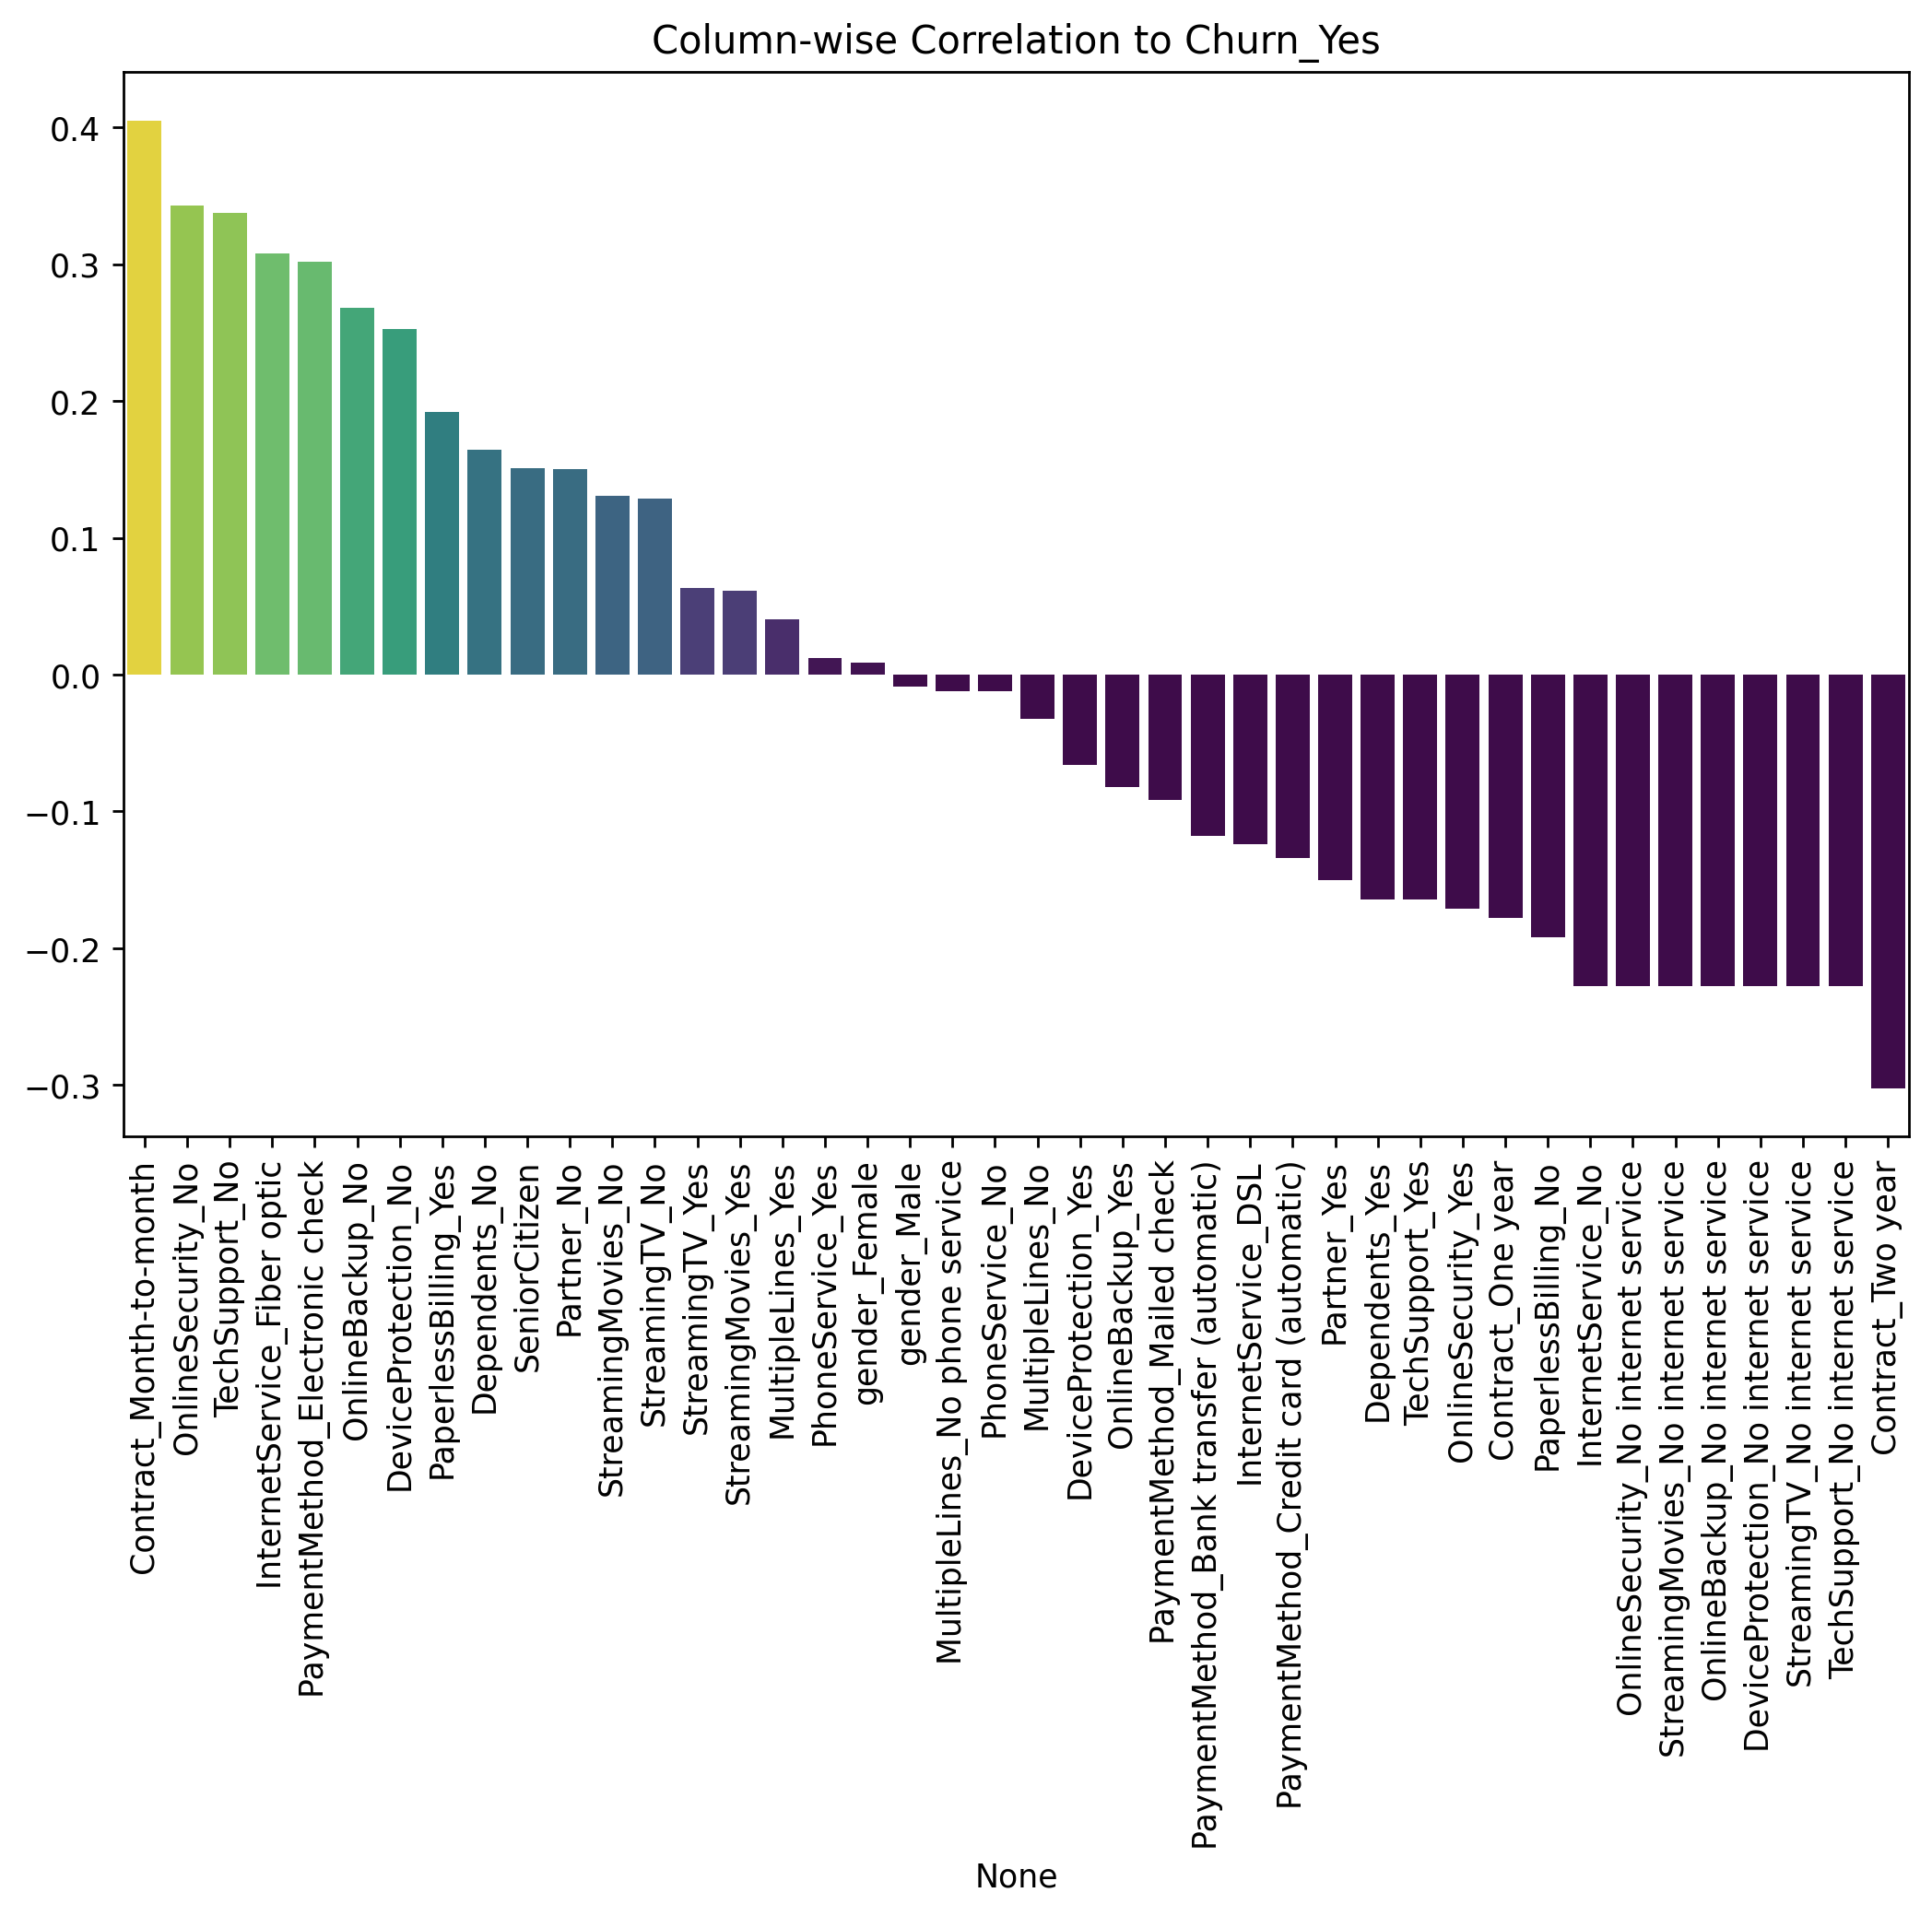

In [ ]:
plt.figure(figsize=(10,6), dpi=250)

palette = sns.color_palette("viridis", as_cmap=True)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values, palette=np.array(palette(corr_yes_churn.values / corr_yes_churn.values.max())))

plt.title('Column-wise Correlation to Churn_Yes')
plt.xticks(rotation=90)
plt.show()

From the graph, I can clearly see how all the features with a positive correlation are directly proportional to customers churning, while the features with a negative correlation are inversely proportional to customer churn.

---

## **Analysing Churn**

In [ ]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [ ]:
df['tenure'].unique() #to see all the diff. tenure lengths

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

<Axes: xlabel='tenure', ylabel='Count'>

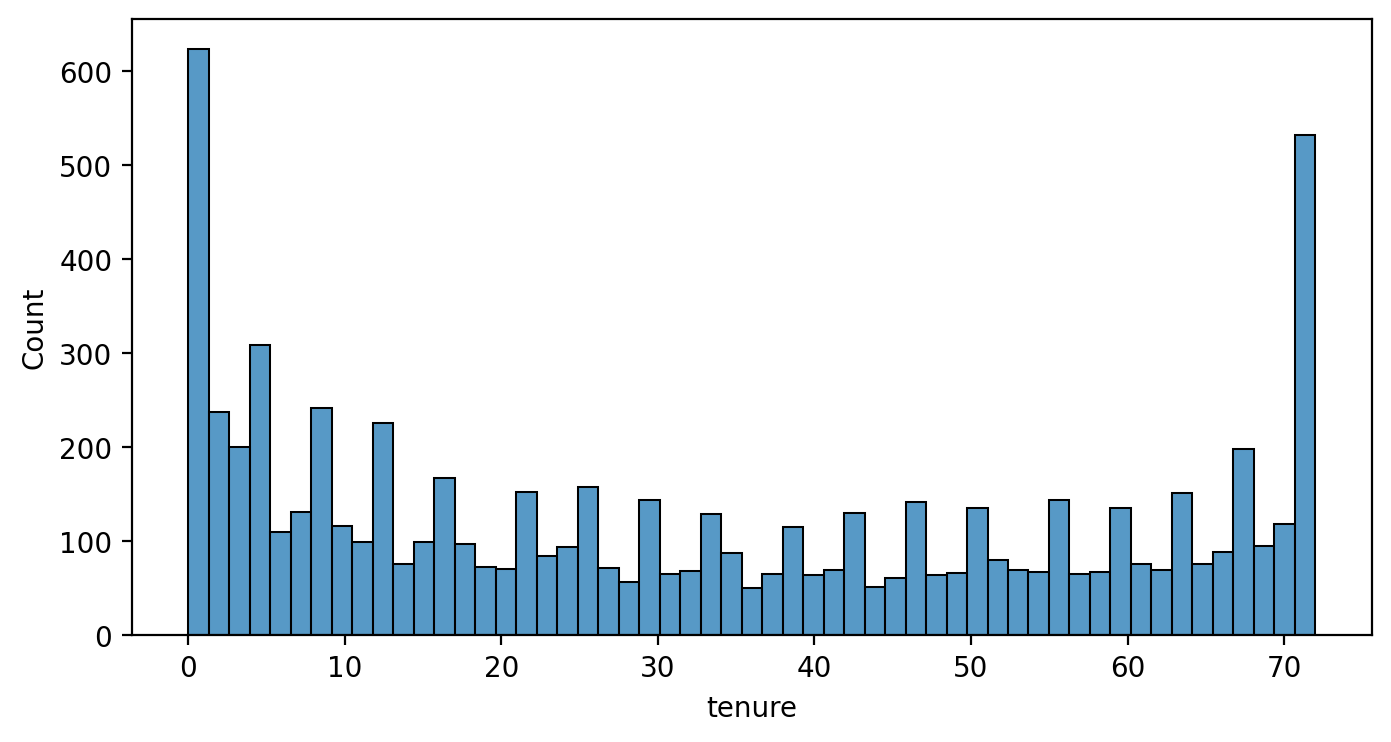

In [ ]:
#Visualising the tenure DISTRIBUTION/spreadness:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=55)

<Figure size 2000x800 with 0 Axes>

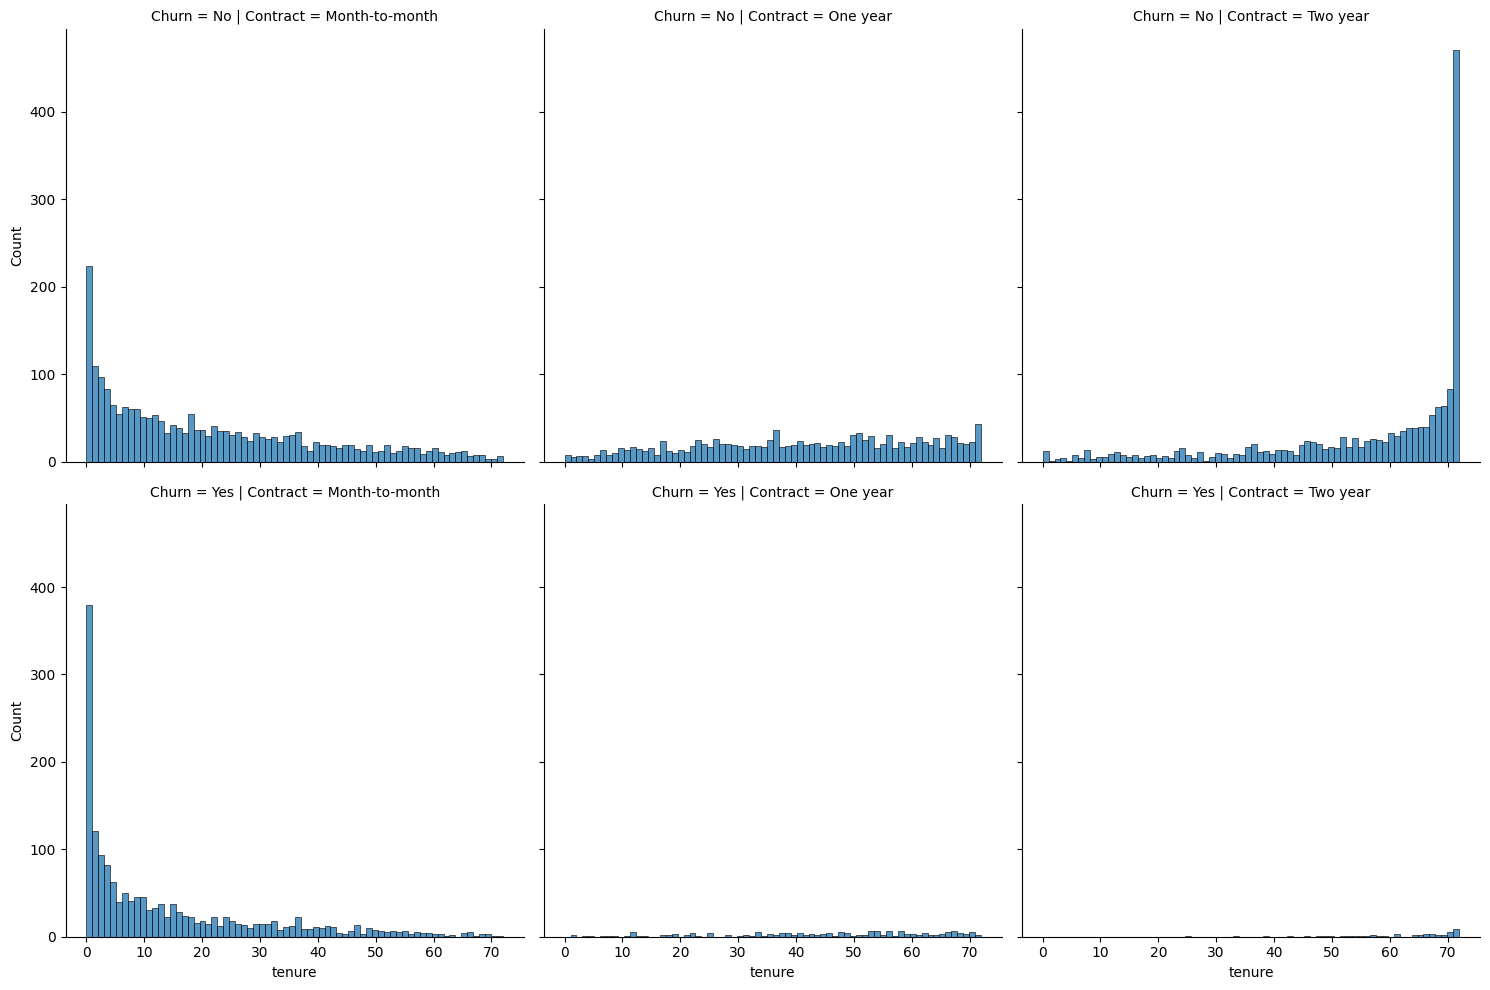

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.displot(data=df,x='tenure',col='Contract',row='Churn',bins=70)

**What I understand from these:**

**Inference from Graphs (Displot):**

- **Month-to-Month:** The bottom left graph illustrates that most people with a month-to-month contract tend to churn after only a few months.

- **Yearly:** Individuals with one-year contracts generally stay fairly consistent.

- **Two-Year: **The graph indicates that most people do not churn after two years, possibly because the service has become a necessity for them or they are satisfied with it.

Let's make a scatterplot now

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

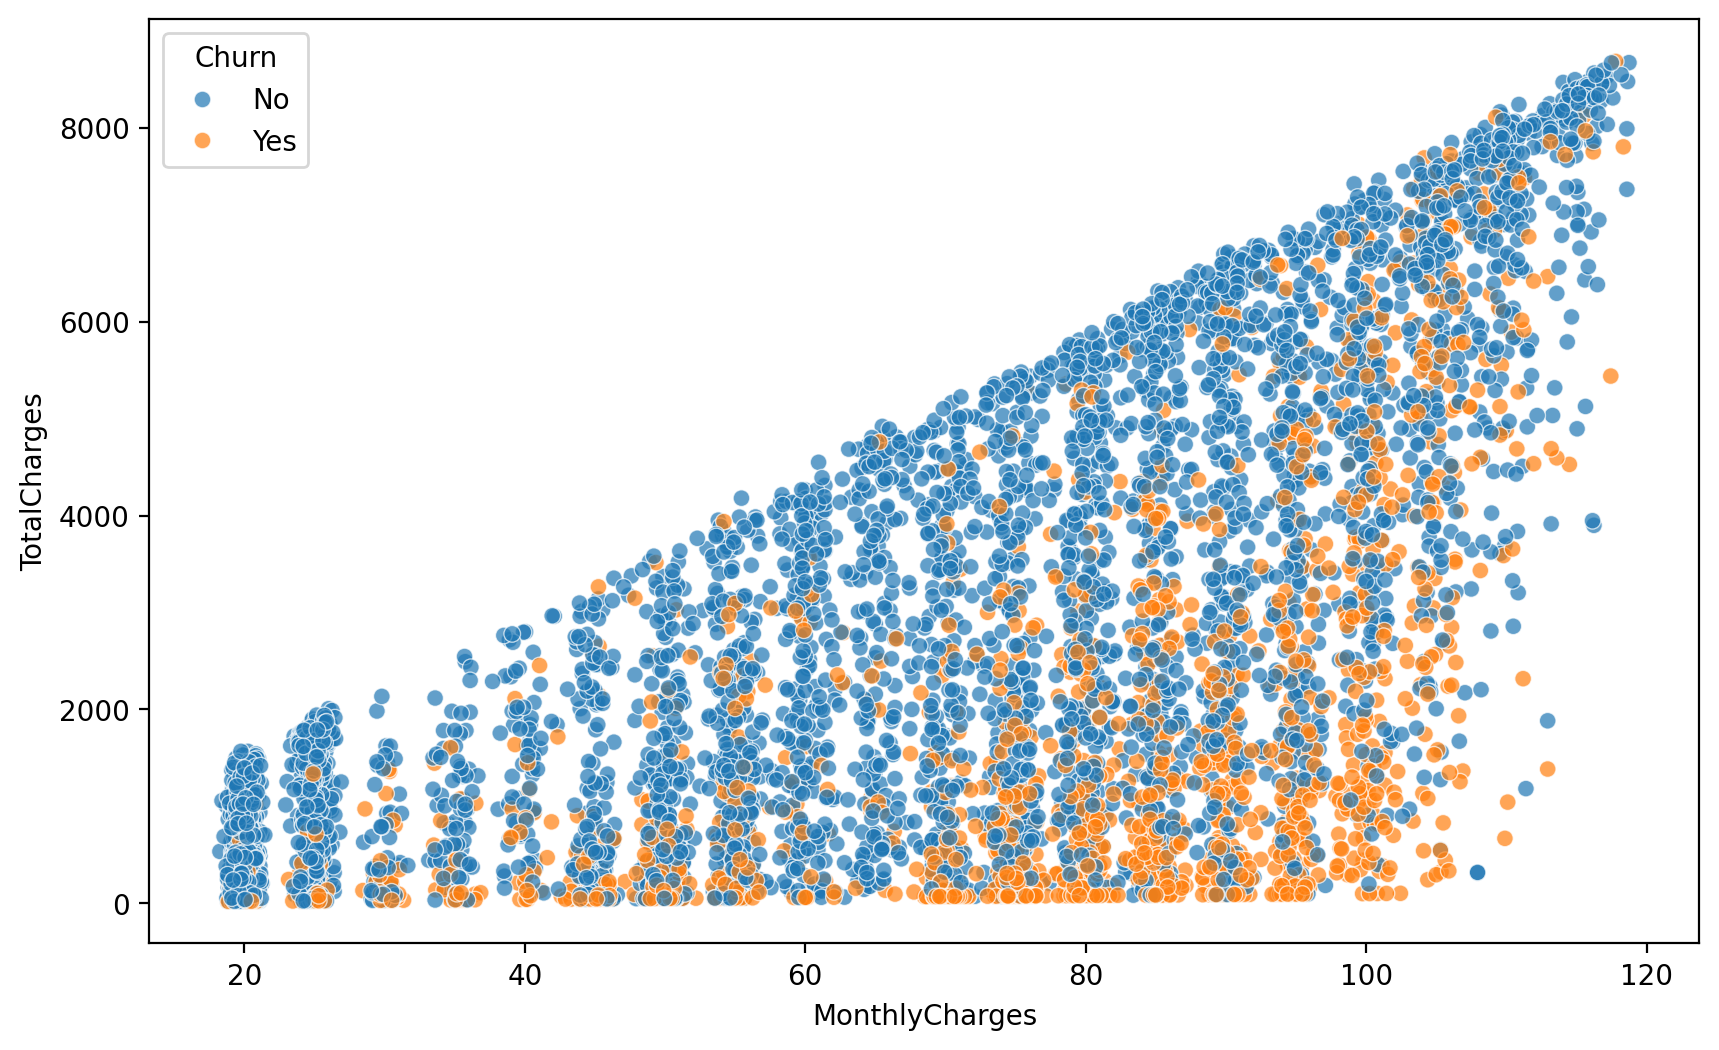

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x=df['MonthlyCharges'],y=df['TotalCharges'],hue='Churn',alpha=0.7)

**Understanding from this:**

- Customers tend to churn significantly more when their monthly charges are high.
- Despite this, the company is not overly concerned because there are still many customers paying the same monthly charges whose total charges are substantially higher and they are not churning.

---

**I will now proceed with Cohort Analysis**

What is **Cohort**?

*Cohort means grouping similar people/customers together.*

- Here, I will treat every month from 1 to N as its own cohort and then calculate the churn percentage aka the % of people who churned.

In [ ]:
df.groupby(['Churn','tenure']).count().transpose()
#shows us the number of people who churned/didn't churn w.r.t the no. of months of their tenure.

Churn             No                                                         \
tenure            0    1    2    3   4   5   6   7   8   9   10  11  12  13   
customerID        11  233  115  106  93  69  70  80  81  73  71  68  79  71   
gender            11  233  115  106  93  69  70  80  81  73  71  68  79  71   
SeniorCitizen     11  233  115  106  93  69  70  80  81  73  71  68  79  71   
Partner           11  233  115  106  93  69  70  80  81  73  71  68  79  71   
Dependents        11  233  115  106  93  69  70  80  81  73  71  68  79  71   
PhoneService      11  233  115  106  93  69  70  80  81  73  71  68  79  71   
MultipleLines     11  233  115  106  93  69  70  80  81  73  71  68  79  71   
InternetService   11  233  115  106  93  69  70  80  81  73  71  68  79  71   
OnlineSecurity    11  233  115  106  93  69  70  80  81  73  71  68  79  71   
OnlineBackup      11  233  115  106  93  69  70  80  81  73  71  68  79  71   
DeviceProtection  11  233  115  106  93  69  70  80  81  73  71  68  79  71   
TechSupport       11  233  115  106  93  69  70  80  81  73  71  68  79  71   
StreamingTV       11  233  115  106  93  69  70  80  81  73  71  68  79  71   
StreamingMovies   11  233  115  106  93  69  70  80  81  73  71  68  79  71   
Contract          11  233  115  106  93  69  70  80  81  73  71  68  79  71   
PaperlessBilling  11  233  115  106  93  69  70  80  81  73  71  68  79  71   
PaymentMethod     11  233  115  106  93  69  70  80  81  73  71  68  79  71   
MonthlyCharges    11  233  115  106  93  69  70  80  81  73  71  68  79  71   
TotalCharges       0  233  115  106  93  69  70  80  81  73  71  68  79  71   

Churn                                                                         \
tenure            14  15  16  17  18  19  20  21  22  23  24  25  26  27  28   
customerID        52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
gender            52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
SeniorCitizen     52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
Partner           52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
Dependents        52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
PhoneService      52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
MultipleLines     52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
InternetService   52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
OnlineSecurity    52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
OnlineBackup      52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
DeviceProtection  52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
TechSupport       52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
StreamingTV       52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
StreamingMovies   52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
Contract          52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
PaperlessBilling  52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
PaymentMethod     52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
MonthlyCharges    52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   
TotalCharges      52  62  52  61  73  54  53  46  63  72  71  56  64  59  45   

Churn                                                                         \
tenure            29  30  31  32  33  34  35  36  37  38  39  40  41  42  43   
customerID        57  56  49  50  50  53  73  40  50  46  42  51  56  51  50   
gender            57  56  49  50  50  53  73  40  50  46  42  51  56  51  50   
SeniorCitizen     57  56  49  50  50  53  73  40  50  46  42  51  56  51  50   
Partner           57  56  49  50  50  53  73  40  50  46  42  51  56  51  50   
Dependents        57  56  49  50  50  53  73  40  50  46  42  51  56  51  50   
PhoneService      57  56  49  50  50  53  73  40  50  46  42  51  56  51  50   
MultipleLines     5

In [ ]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [ ]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [ ]:
yes_churn.head()

tenure          1    2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
customerID     380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   
gender         380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   
SeniorCitizen  380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   
Partner        380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   
Dependents     380  123  94  83  64  40  51  42  46  45  31  38  38  24  37   

tenure         16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
customerID     28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   
gender         28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   
SeniorCitizen  28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   
Partner        28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   
Dependents     28  26  24  19  18  17  27  13  23  23  15  13  12  15  16  16   

tenure         32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  \
customerID     19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   
gender         19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   
SeniorCitizen  19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   
Partner        19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   
Dependents     19  14  12  15  10  15  13  14  13  14  14  15   6   6  12  14   

tenure         48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  \
customerID      9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   
gender          9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   
SeniorCitizen   9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   
Partner         9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   
Dependents      9  15  10   8   8  14  13   9  10   8  11   8   6   8   5   4   

tenure         64  65  66  67  68  69  70  71  72  
customerID      4   9  13  10   9   8  11   6   6  
gender          4   9  13  10   9   8  11   6   6  
SeniorCitizen   4   9  13  10   9   8  11   6   6  
Partner         4   9  13  10   9   8  11   6   6  
Dependents      4   9  13  10   9   8  11   6   6

In [ ]:
churn_rate = 100*yes_churn / (no_churn+yes_churn)

In [ ]:
#tenure for 1 month,churn rate is 61.99%
churn_rate

tenure            0          1          2     3          4          5   \
customerID       NaN  61.990212  51.680672  47.0  47.159091  48.120301   
gender           NaN  61.990212  51.680672  47.0  47.159091  48.120301   
SeniorCitizen    NaN  61.990212  51.680672  47.0  47.159091  48.120301   
Partner          NaN  61.990212  51.680672  47.0  47.159091  48.120301   
Dependents       NaN  61.990212  51.680672  47.0  47.159091  48.120301   
PhoneService     NaN  61.990212  51.680672  47.0  47.159091  48.120301   
MultipleLines    NaN  61.990212  51.680672  47.0  47.159091  48.120301   
InternetService  NaN  61.990212  51.680672  47.0  47.159091  48.120301   
OnlineSecurity   NaN  61.990212  51.680672  47.0  47.159091  48.120301   
OnlineBackup     NaN  61.990212  51.680672  47.0  47.159091  48.120301   
DeviceProtection NaN  61.990212  51.680672  47.0  47.159091  48.120301   
TechSupport      NaN  61.990212  51.680672  47.0  47.159091  48.120301   
StreamingTV      NaN  61.990212  51.680672  47.0  47.159091  48.120301   
StreamingMovies  NaN  61.990212  51.680672  47.0  47.159091  48.120301   
Contract         NaN  61.990212  51.680672  47.0  47.159091  48.120301   
PaperlessBilling NaN  61.990212  51.680672  47.0  47.159091  48.120301   
PaymentMethod    NaN  61.990212  51.680672  47.0  47.159091  48.120301   
MonthlyCharges   NaN  61.990212  51.680672  47.0  47.159091  48.120301   
TotalCharges     NaN  61.990212  51.680672  47.0  47.159091  48.120301   

tenure                   6          7          8          9          10  \
customerID        36.363636  38.931298  34.146341  38.655462  38.793103   
gender            36.363636  38.931298  34.146341  38.655462  38.793103   
SeniorCitizen     36.363636  38.931298  34.146341  38.655462  38.793103   
Partner           36.363636  38.931298  34.146341  38.655462  38.793103   
Dependents        36.363636  38.931298  34.146341  38.655462  38.793103   
PhoneService      36.363636  38.931298  34.146341  38.655462  38.793103   
MultipleLines     36.363636  38.931298  34.146341  38.655462  38.793103   
InternetService   36.363636  38.931298  34.146341  38.655462  38.793103   
OnlineSecurity    36.363636  38.931298  34.146341  38.655462  38.793103   
OnlineBackup      36.363636  38.931298  34.146341  38.655462  38.793103   
DeviceProtection  36.363636  38.931298  34.146341  38.655462  38.793103   
TechSupport       36.363636  38.931298  34.146341  38.655462  38.793103   
StreamingTV       36.363636  38.931298  34.146341  38.655462  38.793103   
StreamingMovies   36.363636  38.931298  34.146341  38.655462  38.793103   
Contract          36.363636  38.931298  34.146341  38.655462  38.793103   
PaperlessBilling  36.363636  38.931298  34.146341  38.655462  38.793103   
PaymentMethod     36.363636  38.931298  34.146341  38.655462  38.793103   
MonthlyCharges    36.363636  38.931298  34.146341  38.655462  38.793103   
TotalCharges      36.363636  38.931298  34.146341  38.655462  38.793103   

tenure                   11         12         13         14         15    16  \
customerID        31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
gender            31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
SeniorCitizen     31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
Partner           31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
Dependents        31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
PhoneService      31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
MultipleLines     31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
InternetService   31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
OnlineSecurity    31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
OnlineBackup      31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
DeviceProtection  31.313131  32.478632  34.862385  31.578947  37.373737  35.0   
TechSupport       31.313131  32.478632  34.862

In [ ]:
#GIVES US CHURN RATE IN % W.R.T THE TENURE(NO. OF MONTHS)

churn_rate.transpose()['customerID']
# I'm only choosing one column because all these values are repeating multiple times and we need them only once.

tenure
0           NaN
1     61.990212
2     51.680672
3     47.000000
4     47.159091
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 73, dtype: float64

<Axes: xlabel='tenure'>

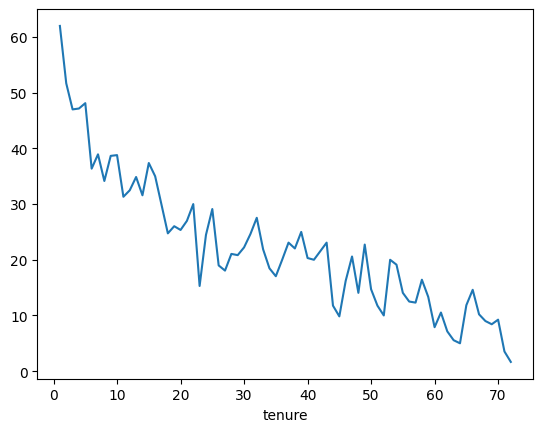

In [ ]:
churn_rate.transpose()['customerID'].plot()

**Understanding from this:**

This shows that people with shorter contracts churn significantly more than those with longer contracts, which makes sense because the longer you are subscribed to a service, the less likely you are to change it.

Let's go deeper into this:

- Generally, companies don't create cohorts based on single tenure values; instead, they group customers into larger segments.
- These segments might include groups like '0-12 Months', '12-24 Months', '24-48 Months', and 'Over 48 Months'.

In [ ]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [ ]:
df['tenure'].apply(cohort)

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7038      12-24 Months
7039    Over 48 Months
7040       0-12 Months
7041       0-12 Months
7042    Over 48 Months
Name: tenure, Length: 7043, dtype: object

In [ ]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [ ]:
df[['tenure','Tenure Cohort']]

tenure   Tenure Cohort
0          1     0-12 Months
1         34    24-48 Months
2          2     0-12 Months
3         45    24-48 Months
4          2     0-12 Months
...      ...             ...
7038      24    12-24 Months
7039      72  Over 48 Months
7040      11     0-12 Months
7041       4     0-12 Months
7042      66  Over 48 Months

[7043 rows x 2 columns]

Plotting another Scatter Plot:


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

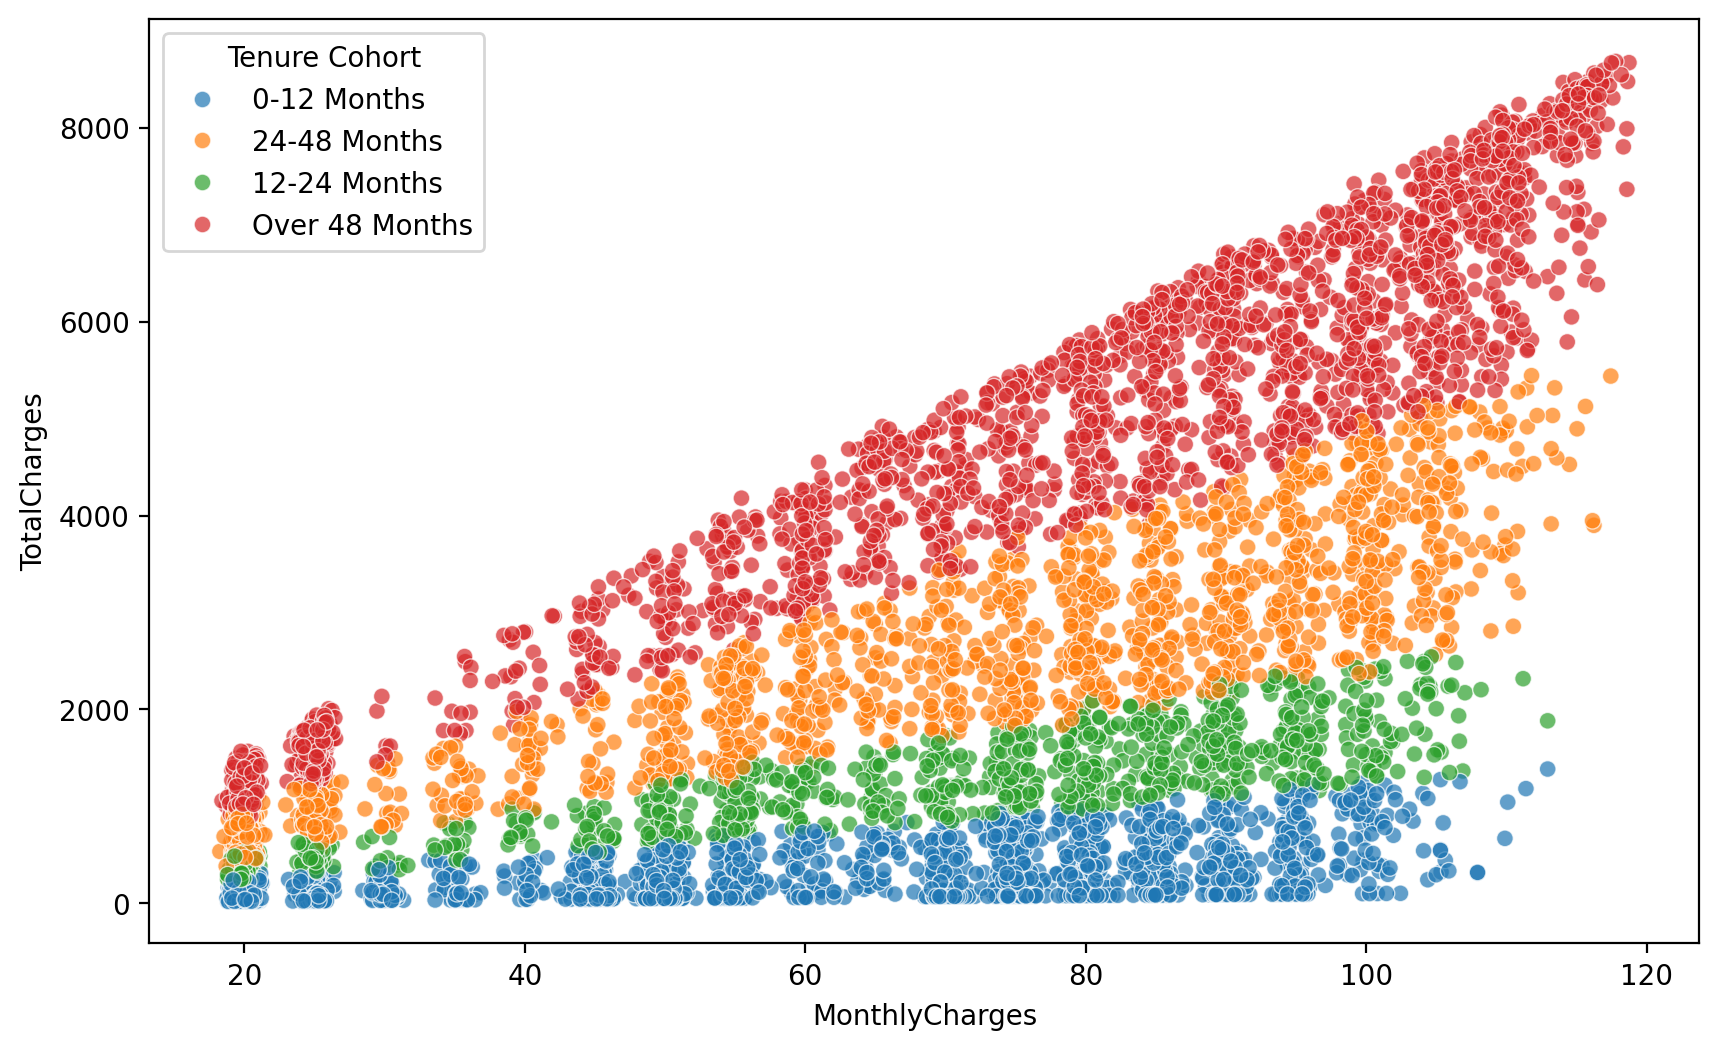

In [ ]:
#same plot as above; we just change the hue from churn to tenure cohort
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x=df['MonthlyCharges'],y=df['TotalCharges'],hue='Tenure Cohort',alpha=0.7)

What I infer from this is:

- **This shows how the longer  customer stays, the HIGHER the total charges which is more profitable for the company.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

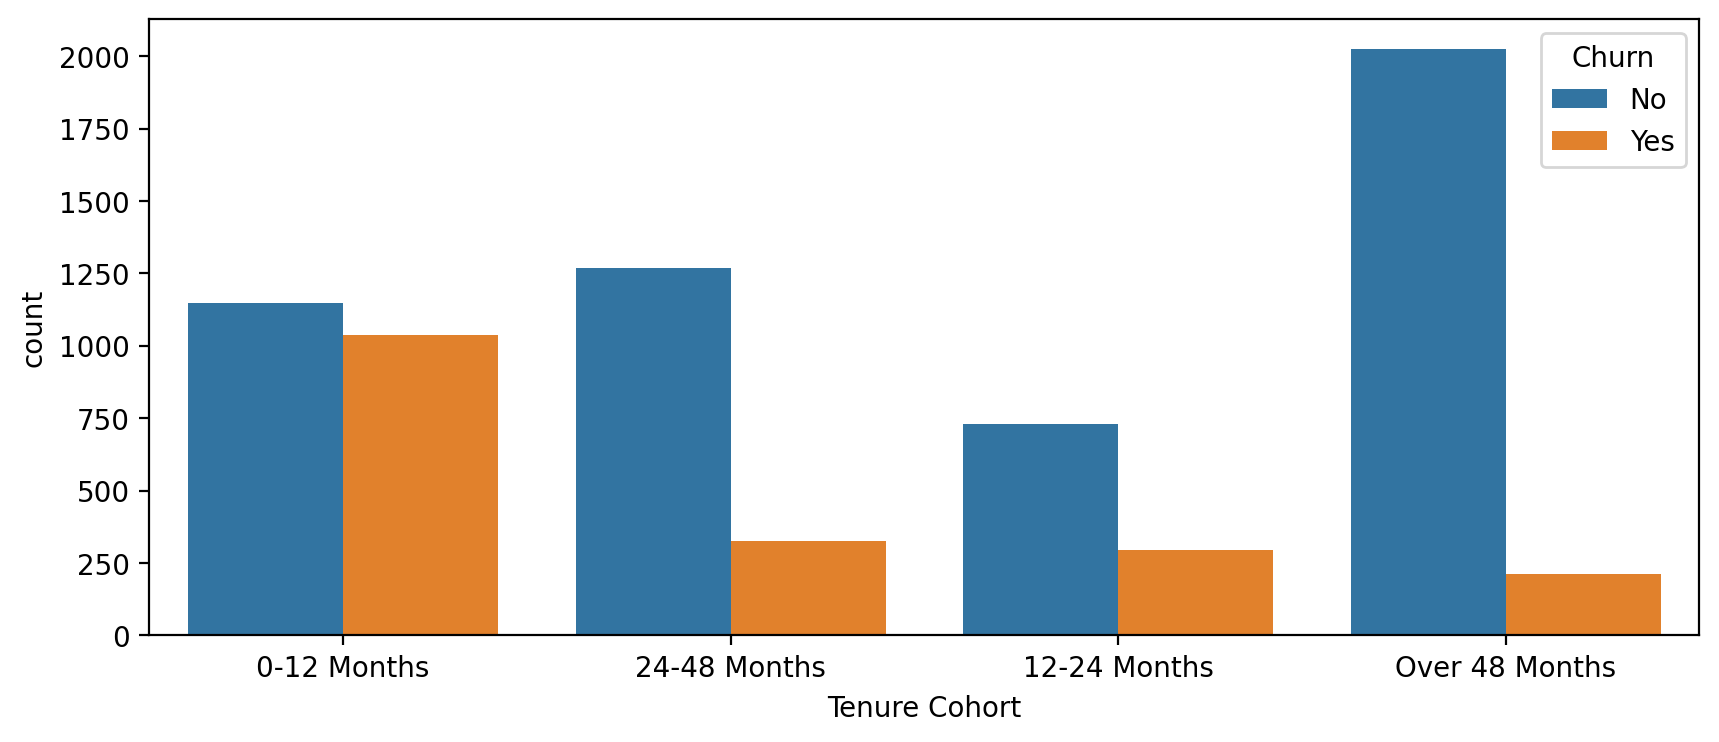

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

- This shows how over time, the churn rate dramatically decreases, so the company's main goal should be to find ways to make customers with shorter contracts stay longer, essentially preventing early churn.

<Figure size 1280x960 with 0 Axes>

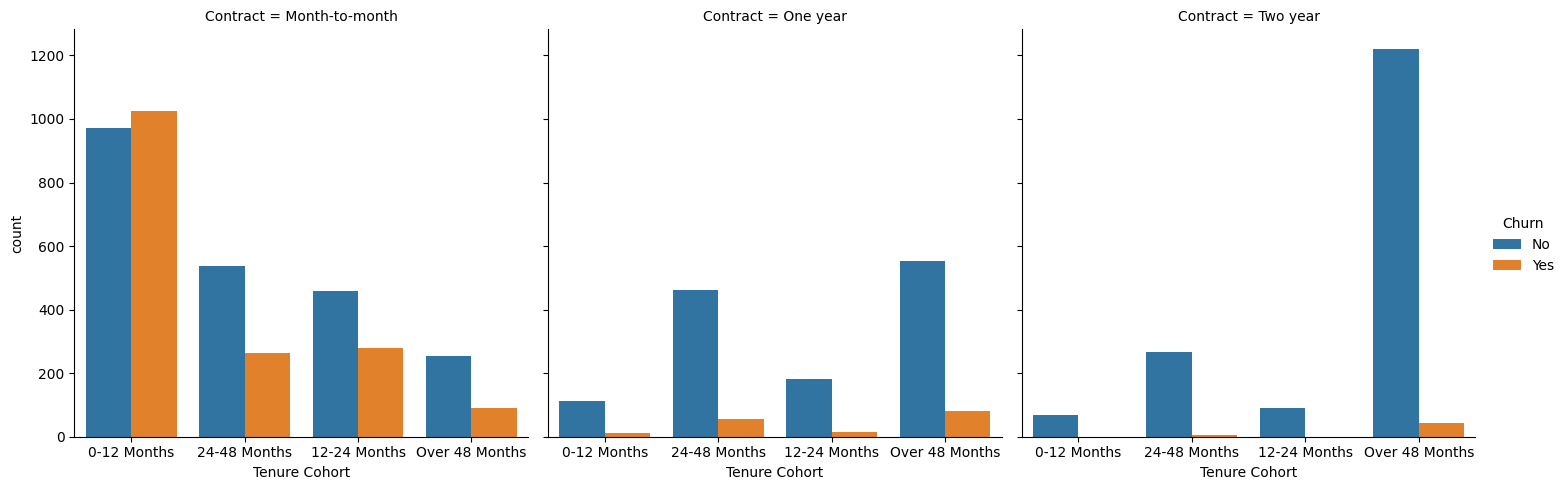

In [ ]:
plt.figure(dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',kind='count',col='Contract');

---

Let's now check the churn in terms of the payment method?

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- In this analysis, I found that the majority of customers who churned were using Electronic Check as their payment method. Conversely, customers who utilized payment methods such as Credit Card Automatic Transfer, Bank Automatic Transfer, or Mailed Check were less likely to churn.

Now I will check the churn distribution with respect to internet and gender.

In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

- Many customers opt for the Fiber optic service, which notably has a high churn rate, potentially indicating dissatisfaction with this type of internet service. Conversely, customers with DSL service constitute the majority and exhibit a lower churn rate compared to those using Fiber optic service.

I will now also check for churn distribution among Partners, Senior citizens and paperless billing.

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- It can be observed that the fraction of senior citizen is very less.
- Most of the senior citizens churn.

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Customers with Paperless Billing are most likely to churn.

---

**Data Manipulation**

There are NaN values, so we can either drop them or impute them with median.
I'm going for the latter approach.

Impute Missing TotalCharges with Median

In [ ]:
# 1) Fill missing TotalCharges with median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# Quick check of missing values after imputation
print("Missing values after median fill:\n", df.isnull().sum())

Missing values after median fill:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Tenure Cohort       0
dtype: int64


<ipython-input-51-7bc82c477bde>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**Create a Numeric Churn Column**

In [ ]:
# Convert 'Churn' from "Yes"/"No" to numeric (1/0)
df['Churn_Encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Quick check of churn distribution
print(df['Churn_Encoded'].value_counts())

Churn_Encoded
0    5174
1    1869
Name: count, dtype: int64


- Models need a numeric target.


**One-Hot Encode Remaining Categorical Columns**

In [ ]:
# Identify object columns (besides 'Churn', which we've already mapped to Churn_Encoded)
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Churn':
        cat_cols.append(col)

print("Categorical columns to encode:", cat_cols)

# Dropping 'Churn' as we dont need it; keep everything else
df_model = df.drop('Churn', axis=1)

# Apply one-hot encoding
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

print("Shape after encoding:", df_model.shape)
df_model.head()

Categorical columns to encode: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure Cohort']
Shape after encoding: (7043, 7076)


SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn_Encoded  \
0              0       1           29.85         29.85              0   
1              0      34           56.95       1889.50              0   
2              0       2           53.85        108.15              1   
3              0      45           42.30       1840.75              0   
4              0       2           70.70        151.65              1   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0014-BMAQU  customerID_0015-UOCOJ  customerID_0016-QLJIS  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0017-DINOC  customerID_0017-IUDMW  customerID_0018-NYROU  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0019-EFAEP  customerID_0019-GFNTW  customerID_0020-INWCK  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0020-JDNXP  customerID_0021-IKXGC  customerID_0022-TCJCI  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0023-HGHWL  customerID_0023-UYUPN  customerID_0023-XUOPT  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0027-KWYKW  customerID_0030-FNXPP  customerID_0031-PVLZI  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   c

- We only encode columns of type object.
- `drop_first=True` avoids redundant dummy columns.
- After this, df_model is purely numeric (including Churn_Encoded, tenure, MonthlyCharges, TotalCharges, etc.).

**Train/Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_model.drop('Churn_Encoded', axis=1)
y = df_model['Churn_Encoded']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train set:", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set: (5634, 7075) (5634,)
Test set:  (1409, 7075) (1409,)


I perform a stratified split to ensure the churn distribution is similar across the training and testing sets. After this, I will train my models on \(X_{train}, y_{train}\) and evaluate them on \(X_{test}, y_{test}\).

---

**Models**

**Model 1: Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize logistic regression (increasing max_iter can avoid convergence warnings)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate
acc_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", acc_logreg)
print("Confusion Matrix:\n", cm_logreg)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7828246983676366
Confusion Matrix:
 [[912 123]
 [183 191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



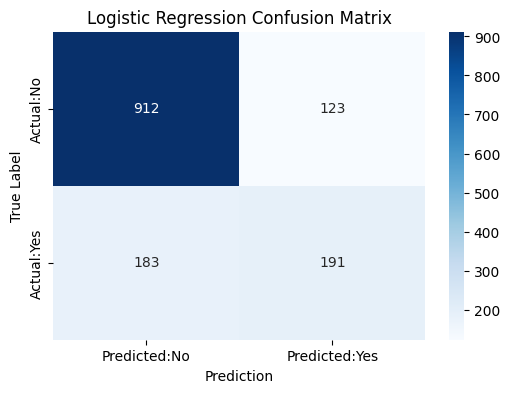

In [ ]:
# Visualize the logistic regression confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted:No','Predicted:Yes'],
            yticklabels=['Actual:No','Actual:Yes'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.show()

I see that my Logistic Regression model achieved about 78.5% accuracy, which isn’t bad for a first pass. It seems to predict “No Churn” more accurately than “Yes Churn,” as shown by the confusion matrix: it caught 910 true “No” cases but only 196 “Yes” cases. The warning tells me it hit the maximum number of iterations, so I’ll likely increase `max_iter` or consider scaling the data before refitting to improve convergence. Next, I’ll proceed to train a Random Forest, which often handles churn classification well and may yield higher performance.

**Model 2: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probability that churn=1

acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Accuracy:", acc_rf)
print("Random Forest ROC AUC:", auc_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)

Random Forest Accuracy: 0.8055358410220014
Random Forest ROC AUC: 0.8388475548322094
Random Forest Confusion Matrix:
 [[956  79]
 [195 179]]


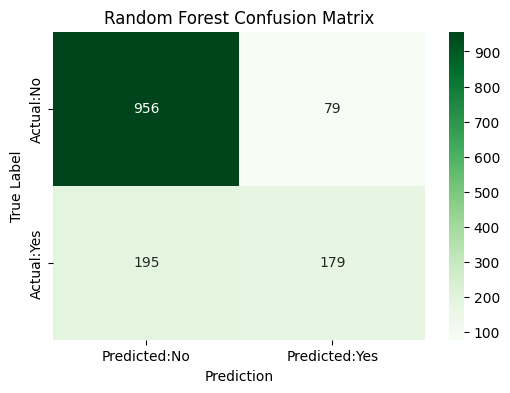

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Predicted:No','Predicted:Yes'],
            yticklabels=['Actual:No','Actual:Yes'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.show()

I see that my Random Forest model achieved about 80.6% accuracy, which is a bit higher than logistic regression, and the ROC AUC is around 0.84, indicating better discrimination between churners and non-churners. The confusion matrix shows 956 correctly identified non-churners and 179 correctly identified churners, which suggests the model still underpredicts churn somewhat. However, this improvement in performance over logistic regression suggests that a tree-based method might be a more powerful approach for this churn dataset.

<ipython-input-60-5204612b4cef>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




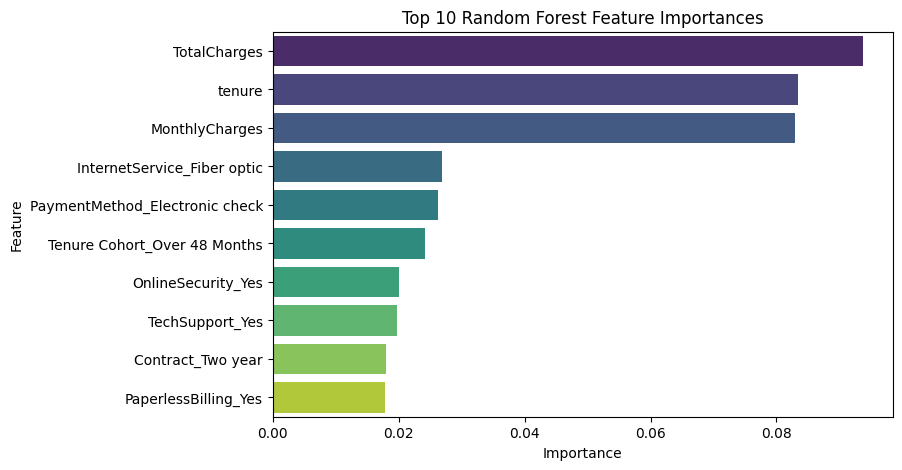

In [ ]:
# 1) Retrieve feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# 2) Create a DataFrame for sorting and plotting
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# 3) Plot
plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp_df.head(10), x='importance', y='feature', orient='h', palette='viridis')
plt.title("Top 10 Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

This graph tells us how we should also look into the internet service column to further identify how it affected the churn rate and what to do next.

**Model 3 - XGBoost**

In [ ]:
!pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[19:26:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 0.7984386089425124
XGBoost ROC AUC: 0.8404298741894649
XGBoost Confusion Matrix:
 [[926 109]
 [175 199]]


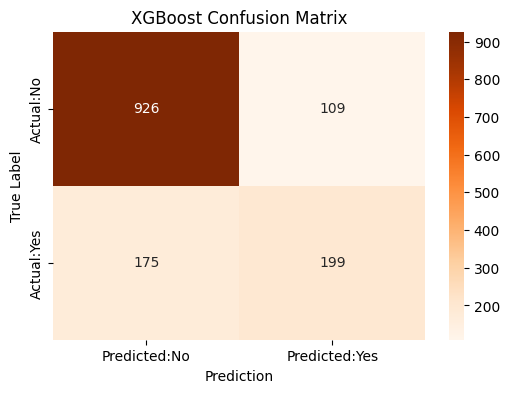

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# 1) Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 2) Fit on the training data
xgb_clf.fit(X_train, y_train)

# 3) Predict on the test data
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# 4) Evaluate
acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Accuracy:", acc_xgb)
print("XGBoost ROC AUC:", auc_xgb)
print("XGBoost Confusion Matrix:\n", cm_xgb)

# heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Predicted:No','Predicted:Yes'],
            yticklabels=['Actual:No','Actual:Yes'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("True Label")
plt.show()

In [85]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



Looking at the XGBoost model's performance, it’s pretty clear that it does a decent job in predicting customer churn. For customers who didn't churn, which are the majority at 1035 entries, the model has a precision of 0.84 and a recall of 0.89. This means it correctly identifies 89% of the non-churning customers and out of all the predictions it made for non-churning, 84% were correct. That’s quite effective!

For the churning customers, which are fewer at 374, the precision is 0.65 and the recall is 0.53. This tells us that when it predicts a customer will churn, it's right 65% of the time. However, it only correctly identifies 53% of all actual churners, so there's definitely room for improvement in catching more of these potentially lost customers.

Overall, the model reaches an accuracy of 80% across all predictions, which is pretty good. But the challenge remains in improving how we catch those at risk of churning without mistakenly labeling too many loyal customers as potential churners. It's a balance, but these results are a solid starting point for further tuning or perhaps combining insights from other models.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[21:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


<ipython-input-104-57ca8d74055f>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




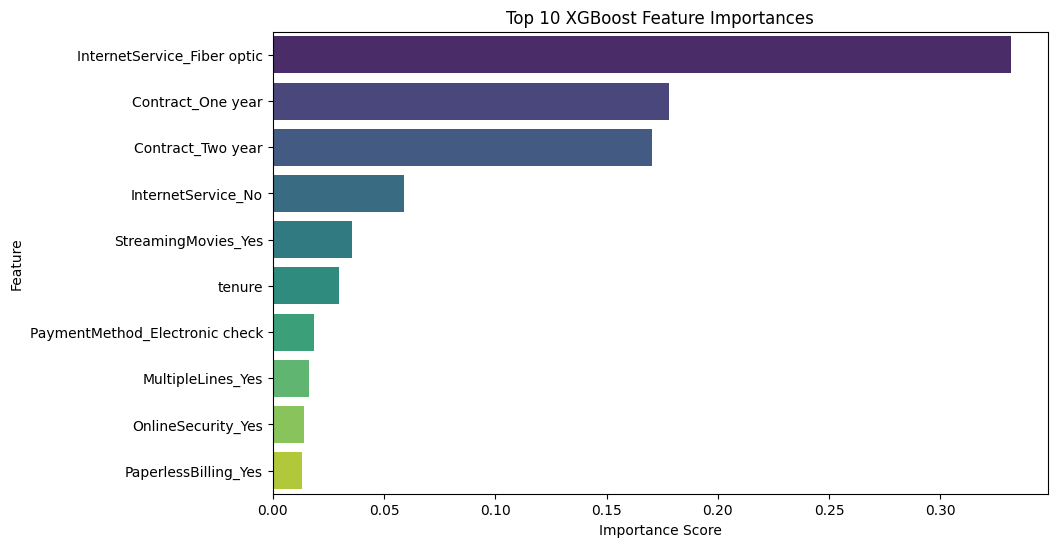

In [104]:
X_train_enc = pd.get_dummies(X_train)
X_test_enc = pd.get_dummies(X_test)

X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# Train the XGBoost Model
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                            random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_enc, y_train)

# Extract feature importances
importances = xgb_clf.feature_importances_
feature_names = X_train_enc.columns

# Convert to DataFrame and sort
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

---

**Model 4 - AdaBoost**

I have now chosen for AdaBoost because after determining the size of the dataset, Adaboost would be less computationnly expensive and also be faster.

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
ada_model = AdaBoostClassifier()

In [93]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [94]:
ada_preds = ada_model.predict(X_test)

### **Adaboost:**

In [70]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
importances = ada_clf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - AdaBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

The AdaBoost model also shows a decent performance, similar to the XGBoost in some aspects. For customers who did not churn, represented by 1035 entries in the dataset, the model achieved a precision of 0.83 and a recall of 0.91. This indicates that the model is quite reliable in identifying non-churners, correctly predicting 91% of them, and when it predicts that a customer won't churn, it’s accurate about 83% of the time.

For the customers predicted to churn, about 374 in the dataset, the precision drops a bit to 0.66 and the recall to 0.50. This shows that while the model is fairly accurate when it flags a churner (66% accuracy), it only correctly identifies half of the actual churners. This suggests that while the model is cautious and effective in its predictions for non-churners, it could be missing out on identifying a significant number of potential churners.

Overall, the AdaBoost model achieves an overall accuracy of 80%, mirroring the performance we saw with XGBoost. The primary area for improvement remains enhancing the detection of churners without overly compromising the accuracy for non-churners. This model provides a robust starting point but may benefit from further exploration or a hybrid approach with other models to improve recall for churn predictions.

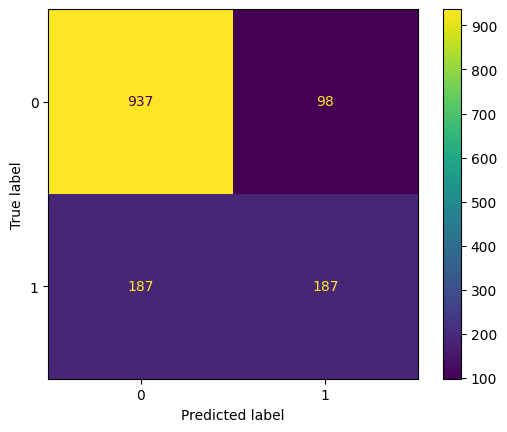

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, ada_preds, labels=ada_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_model.classes_)

disp.plot(cmap='viridis')
plt.show()

<ipython-input-106-a7ce659a8741>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




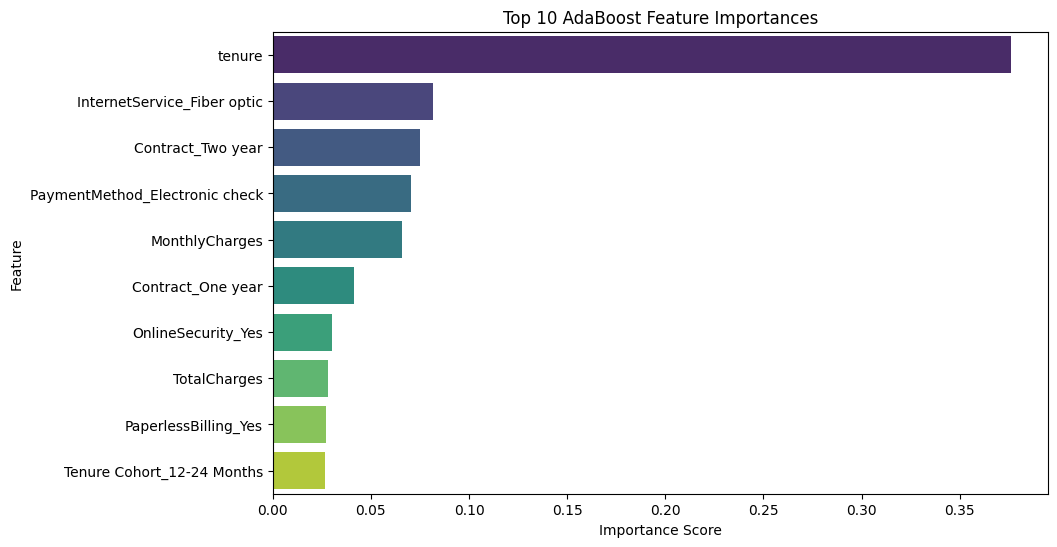

In [106]:
from sklearn.ensemble import AdaBoostClassifier

X_train_enc = pd.get_dummies(X_train)
X_test_enc = pd.get_dummies(X_test)

X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_enc, y_train)

# Extract feature importances
importances = ada_clf.feature_importances_
feature_names = X_train_enc.columns

# Convert to DataFrame and sort
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 AdaBoost Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

After comparing the performance of various models like Logistic Regression, Random Forest, XGBoost, and AdaBoost, it looks like AdaBoost and XGBoost have come out on top. These models showed the best balance between precision and recall, which is key for predicting customer churn effectively.

XGBoost did perform slightly better in terms of the ROC AUC and precision-recall metrics, showing it's a strong model. But it does require more computing power, which could be a drawback when we need to scale up or need quick results. AdaBoost, while not far behind, does offer a nice middle ground—it's not as heavy on resources and still delivers good results.

Given everything, AdaBoost seems like the smart choice for TelConnect. It's efficient and effective, fitting well with our need to manage costs while still aggressively addressing customer churn. I suggest we fine-tune AdaBoost a bit more to squeeze out even better performance. This should help us not just react to customer churn, but get ahead of it, ensuring we're not only keeping our current customers happy but also maintaining our profitability.

**Compare Feature Importances**

<Figure size 1200x800 with 0 Axes>

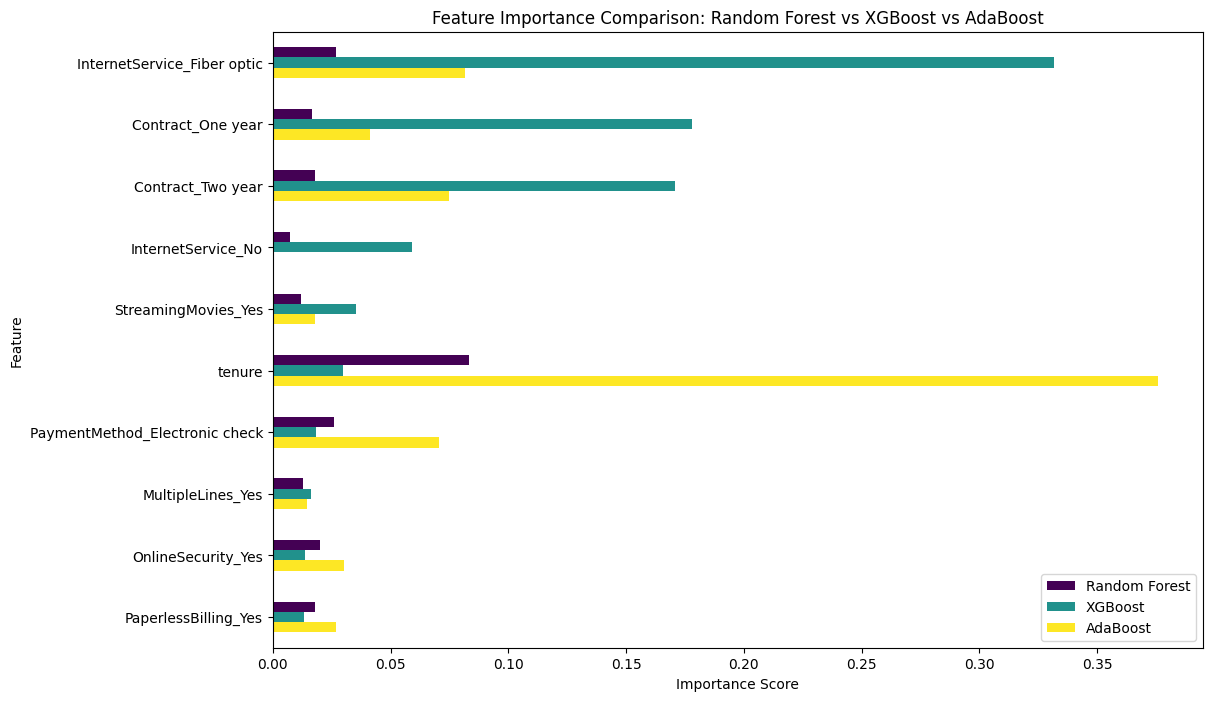

In [107]:
# Combine feature importances from all three models
models = ["Random Forest", "XGBoost", "AdaBoost"]
feature_importance_dict = {
    "Random Forest": rf.feature_importances_,
    "XGBoost": xgb_clf.feature_importances_,
    "AdaBoost": ada_clf.feature_importances_
}

# Convert to DataFrame
feature_names = X_train_enc.columns
importance_df = pd.DataFrame(feature_importance_dict, index=feature_names)

# Sort by XGBoost importance
importance_df = importance_df.sort_values(by="XGBoost", ascending=False)

# Plot feature importances
plt.figure(figsize=(12,8))
importance_df.head(10).plot(kind="barh", figsize=(12,8), colormap="viridis")
plt.title("Feature Importance Comparison: Random Forest vs XGBoost vs AdaBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.legend(models)
plt.gca().invert_yaxis()
plt.show()

---

**Precision-Recall Curve**

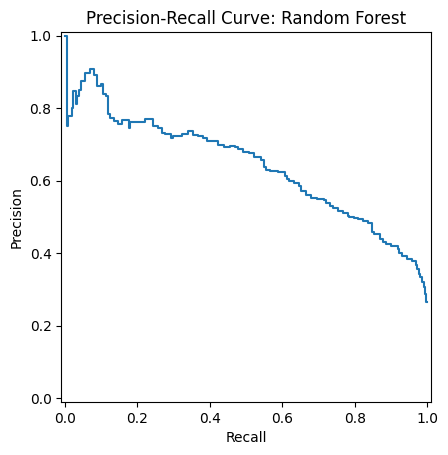

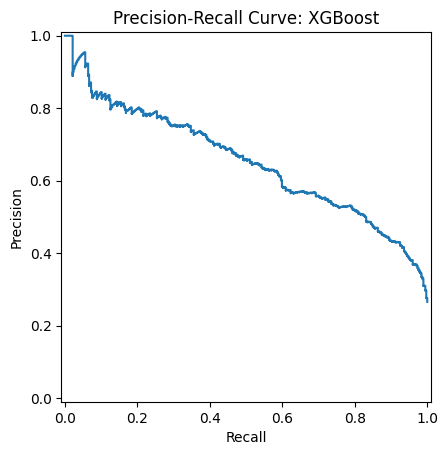

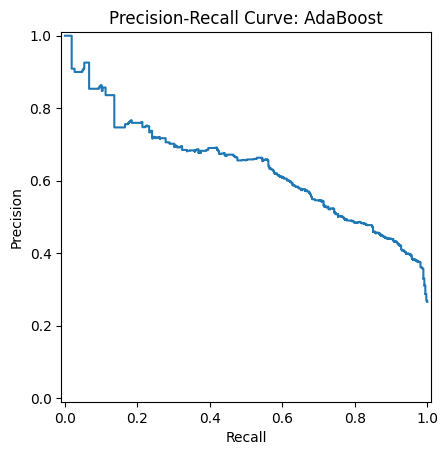

In [99]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Precision-Recall for Random Forest
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_proba_rf)
disp_rf = PrecisionRecallDisplay(precision=precision_rf, recall=recall_rf)
disp_rf.plot()
plt.title('Precision-Recall Curve: Random Forest')
plt.show()

# Precision-Recall for XGBoost
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_proba_xgb)
disp_xgb = PrecisionRecallDisplay(precision=precision_xgb, recall=recall_xgb)
disp_xgb.plot()
plt.title('Precision-Recall Curve: XGBoost')
plt.show()

# Precision-Recall for AdaBoost
precision_ada, recall_ada, thresholds_ada = precision_recall_curve(y_test, ada_model.predict_proba(X_test)[:, 1])
disp_ada = PrecisionRecallDisplay(precision=precision_ada, recall=recall_ada)
disp_ada.plot()
plt.title('Precision-Recall Curve: AdaBoost')
plt.show()

---

**Cost-Benefit / Threshold Analysis**

In [100]:
import numpy as np

# Set parameters for the analysis
voucher_cost = 30
avg_monthly_revenue = 65
avg_retention_months = 6  # How many extra months they stay if saved
value_if_retained = avg_monthly_revenue * avg_retention_months  # Total value if customer is retained

# Predict probabilities using the XGBoost model
y_probs = xgb_clf.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.1)
for t in thresholds:
    # Apply the threshold to determine predicted classes
    y_pred_thr = (y_probs >= t).astype(int)

    # Calculate confusion matrix elements
    tp = sum((y_test == 1) & (y_pred_thr == 1))
    fp = sum((y_test == 0) & (y_pred_thr == 1))
    fn = sum((y_test == 1) & (y_pred_thr == 0))
    tn = sum((y_test == 0) & (y_pred_thr == 0))

    # Financial impact calculations
    total_gain = tp * value_if_retained
    total_cost = (tp + fp) * voucher_cost
    net_savings = total_gain - total_cost

    # Output the results for each threshold
    print(f"Threshold={t:.2f} | TP={tp}, FP={fp}, FN={fn}, TN={tn} | Net Savings=${net_savings:.2f}")

Threshold=0.10 | TP=350, FP=497, FN=24, TN=538 | Net Savings=$111090.00
Threshold=0.20 | TP=316, FP=338, FN=58, TN=697 | Net Savings=$103620.00
Threshold=0.30 | TP=284, FP=256, FN=90, TN=779 | Net Savings=$94560.00
Threshold=0.40 | TP=236, FP=181, FN=138, TN=854 | Net Savings=$79530.00
Threshold=0.50 | TP=199, FP=109, FN=175, TN=926 | Net Savings=$68370.00
Threshold=0.60 | TP=143, FP=53, FN=231, TN=982 | Net Savings=$49890.00
Threshold=0.70 | TP=96, FP=28, FN=278, TN=1007 | Net Savings=$33720.00
Threshold=0.80 | TP=53, FP=12, FN=321, TN=1023 | Net Savings=$18720.00
Threshold=0.90 | TP=13, FP=1, FN=361, TN=1034 | Net Savings=$4650.00


In [109]:
# Financial Impact Calculation
thresholds = np.arange(0.1, 1.0, 0.1)
results = []
for t in thresholds:
    y_pred_thr = (y_proba_xgb >= t).astype(int)
    tp = sum((y_test == 1) & (y_pred_thr == 1))
    fp = sum((y_test == 0) & (y_pred_thr == 1))
    total_gain = tp * (avg_monthly_revenue * avg_retention_months)
    total_cost = (tp + fp) * voucher_cost
    net_savings = total_gain - total_cost
    results.append((t, tp, fp, total_gain, total_cost, net_savings))

for res in results:
    print(f"Threshold: {res[0]:.2f} | TP: {res[1]} | FP: {res[2]} | Total Gain: ${res[3]:,.2f} | Total Cost: ${res[4]:,.2f} | Net Savings: ${res[5]:,.2f}")

Threshold: 0.10 | TP: 350 | FP: 497 | Total Gain: $136,500.00 | Total Cost: $25,410.00 | Net Savings: $111,090.00
Threshold: 0.20 | TP: 316 | FP: 338 | Total Gain: $123,240.00 | Total Cost: $19,620.00 | Net Savings: $103,620.00
Threshold: 0.30 | TP: 284 | FP: 256 | Total Gain: $110,760.00 | Total Cost: $16,200.00 | Net Savings: $94,560.00
Threshold: 0.40 | TP: 236 | FP: 181 | Total Gain: $92,040.00 | Total Cost: $12,510.00 | Net Savings: $79,530.00
Threshold: 0.50 | TP: 199 | FP: 109 | Total Gain: $77,610.00 | Total Cost: $9,240.00 | Net Savings: $68,370.00
Threshold: 0.60 | TP: 143 | FP: 53 | Total Gain: $55,770.00 | Total Cost: $5,880.00 | Net Savings: $49,890.00
Threshold: 0.70 | TP: 96 | FP: 28 | Total Gain: $37,440.00 | Total Cost: $3,720.00 | Net Savings: $33,720.00
Threshold: 0.80 | TP: 53 | FP: 12 | Total Gain: $20,670.00 | Total Cost: $1,950.00 | Net Savings: $18,720.00
Threshold: 0.90 | TP: 13 | FP: 1 | Total Gain: $5,070.00 | Total Cost: $420.00 | Net Savings: $4,650.00


- At a low threshold (0.10), we identify many customers as at-risk of churning (TP=350), but we also end up targeting many who aren't planning to leave (FP=497), resulting in good savings but higher unnecessary costs.

- As we increase the threshold, the number of false positives drops, which means we're not wasting as many resources on customers who aren't at risk. By the time we reach a threshold of 0.50, we strike a better balance, with net savings at $68,370.

- If we set the threshold too high (0.80 or 0.90), we miss too many at-risk customers, leading to much lower savings ($18,720 and $4,650).

A moderate threshold around 0.30 to 0.50 seems best, as it helps us effectively manage resources by correctly identifying customers who need attention while avoiding overspending on those who don’t. This approach helps optimize our retention strategy and keeps costs in check.

---

Thank you!

Monisha Patro